# **Project Smoking Body Signals**

## Kaggle Project

https://www.kaggle.com/datasets/kukuroo3/body-signal-of-smoking

## **Objective**
* The goal of this project was to predict whether an individual is a smoker or not based on health markers.

* The dataset corresponds to a collection of various health-related biological signals that could be associated with a person who smokes

## Pip & Requirements

###### **(README.md)**

## Version Check

In [6]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib  # Import the main matplotlib module

print("scikit-learn version:", sklearn.__version__)
print("pandas version:", pd.__version__)
print("numpy version:", np.__version__)
print("matplotlib version:", matplotlib.__version__)  # Access via matplotlib

scikit-learn version: 1.4.1.post1
pandas version: 2.1.4
numpy version: 1.25.2
matplotlib version: 3.7.1


In [ ]:
from pickle import load
model = load(open("random_forest_model_Default.pkl", "rb"))
print(model)  # Verifica que se carga bien

## All Imports

### Global Imports for EDA, visualization

In [ ]:
import os
import timeit
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
from pickle import dump

### Machine Learning Modeling

In [74]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [75]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [98]:
#pip install pycaret

In [99]:
#pip install --upgrade scikit-plot

In [100]:
#pip install scipy==1.9.3

In [101]:
#pip install --upgrade pycaret

In [1]:
#from pycaret.classification import setup, compare_models

In [83]:
import sklearn
print(sklearn.__version__)

1.4.1.post1


#### Problems New font

In [11]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

sudo apt-get install ttf-mscorefonts-installer ----terminal

## Loading Data

In [15]:
total_data = pd.read_csv("/workspaces/Body_Signals_of_Smoking/data/raw/smoking.csv")
total_data.head ()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


 ## First Blick:

* Data Format: The dataset appears to be structured as a tabular format, with each row representing an individual and each column representing a specific attribute or feature related to their health and demographics.

* Features: The dataset contains a variety of features including demographic information such as gender, age, height, and weight, as well as biomedical indicators like hemoglobin levels, cholesterol, and liver enzyme levels (AST, ALT, Gtp).

* Categorical Features: Some features are categorical, such as gender and smoking status, while others are numerical, such as age and height. Categorical features may require encoding before being used in machine learning models.

* Missing Values: It's important to check for missing values in the dataset, as missing data can affect the analysis and modeling process.

* Target Variable: It seems like there is a target variable named "smoking" which indicates whether an individual is a smoker or not. This would likely be the target variable for classification tasks.

* Data Quality: Assessing the quality and consistency of the data is crucial. For example, checking for outliers or anomalies in the numerical features, and ensuring that categorical variables have consistent encoding.

**Summary**: Overall, conducting a thorough exploratory data analysis (EDA) will provide deeper insights into the data distribution, relationships between variables, and potential challenges that need to be addressed during preprocessing and modeling.








In [16]:
total_data.shape

(55692, 27)

In [17]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

**Initial Summary**: Gender, oral health, dental caries, and tartar are categorical variables, and we have chosen *Smoking* as our predictive variable.

Next, we are going to visualize the data to confirm our initial assessment.

In [18]:
total_data.smoking.value_counts()

smoking
0    35237
1    20455
Name: count, dtype: int64

0 = Non Smoking
1 = Smoking

Majority of Non-Smoker but close parity

### Null Values Management

In [19]:
total_data.isnull().sum().sort_values(ascending=False)

ID                     0
gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64

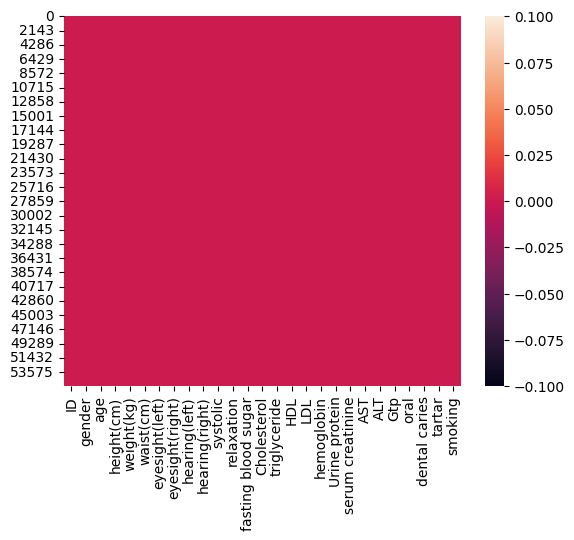

In [20]:
sns.heatmap(total_data.isnull(), annot=False)

plt.show()

We observe that there are no missing values; therefore, there should be no need to transform the data.

### Duplicates Management

In [21]:
###Duplicados
duplicates = total_data.duplicated().sum()
print(f"Numero de duplicados {duplicates}")

#####Para eliminar los duplicados
total_data = total_data.drop_duplicates().reset_index(drop = True)
print(f"Numero de duplicados luego de la limpieza: {total_data.duplicated().sum()}")



Numero de duplicados 0
Numero de duplicados luego de la limpieza: 0


We observe that there are no duplicate values; therefore, there should be no need to transform the data

### Eliminate irrelevant information 1

The ID column will be eliminated because it is not a variable that can contribute to the model, since it corresponds to a variable that identifies each individual in the dataset.

In [22]:
total_data.drop(['ID'], axis=1, inplace=True)

In [23]:
total_data.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  object 
 1   age                  55692 non-null  int64  
 2   height(cm)           55692 non-null  int64  
 3   weight(kg)           55692 non-null  int64  
 4   waist(cm)            55692 non-null  float64
 5   eyesight(left)       55692 non-null  float64
 6   eyesight(right)      55692 non-null  float64
 7   hearing(left)        55692 non-null  float64
 8   hearing(right)       55692 non-null  float64
 9   systolic             55692 non-null  float64
 10  relaxation           55692 non-null  float64
 11  fasting blood sugar  55692 non-null  float64
 12  Cholesterol          55692 non-null  float64
 13  triglyceride         55692 non-null  float64
 14  HDL                  55692 non-null  float64
 15  LDL                  55692 non-null 

## **Data Visualization**

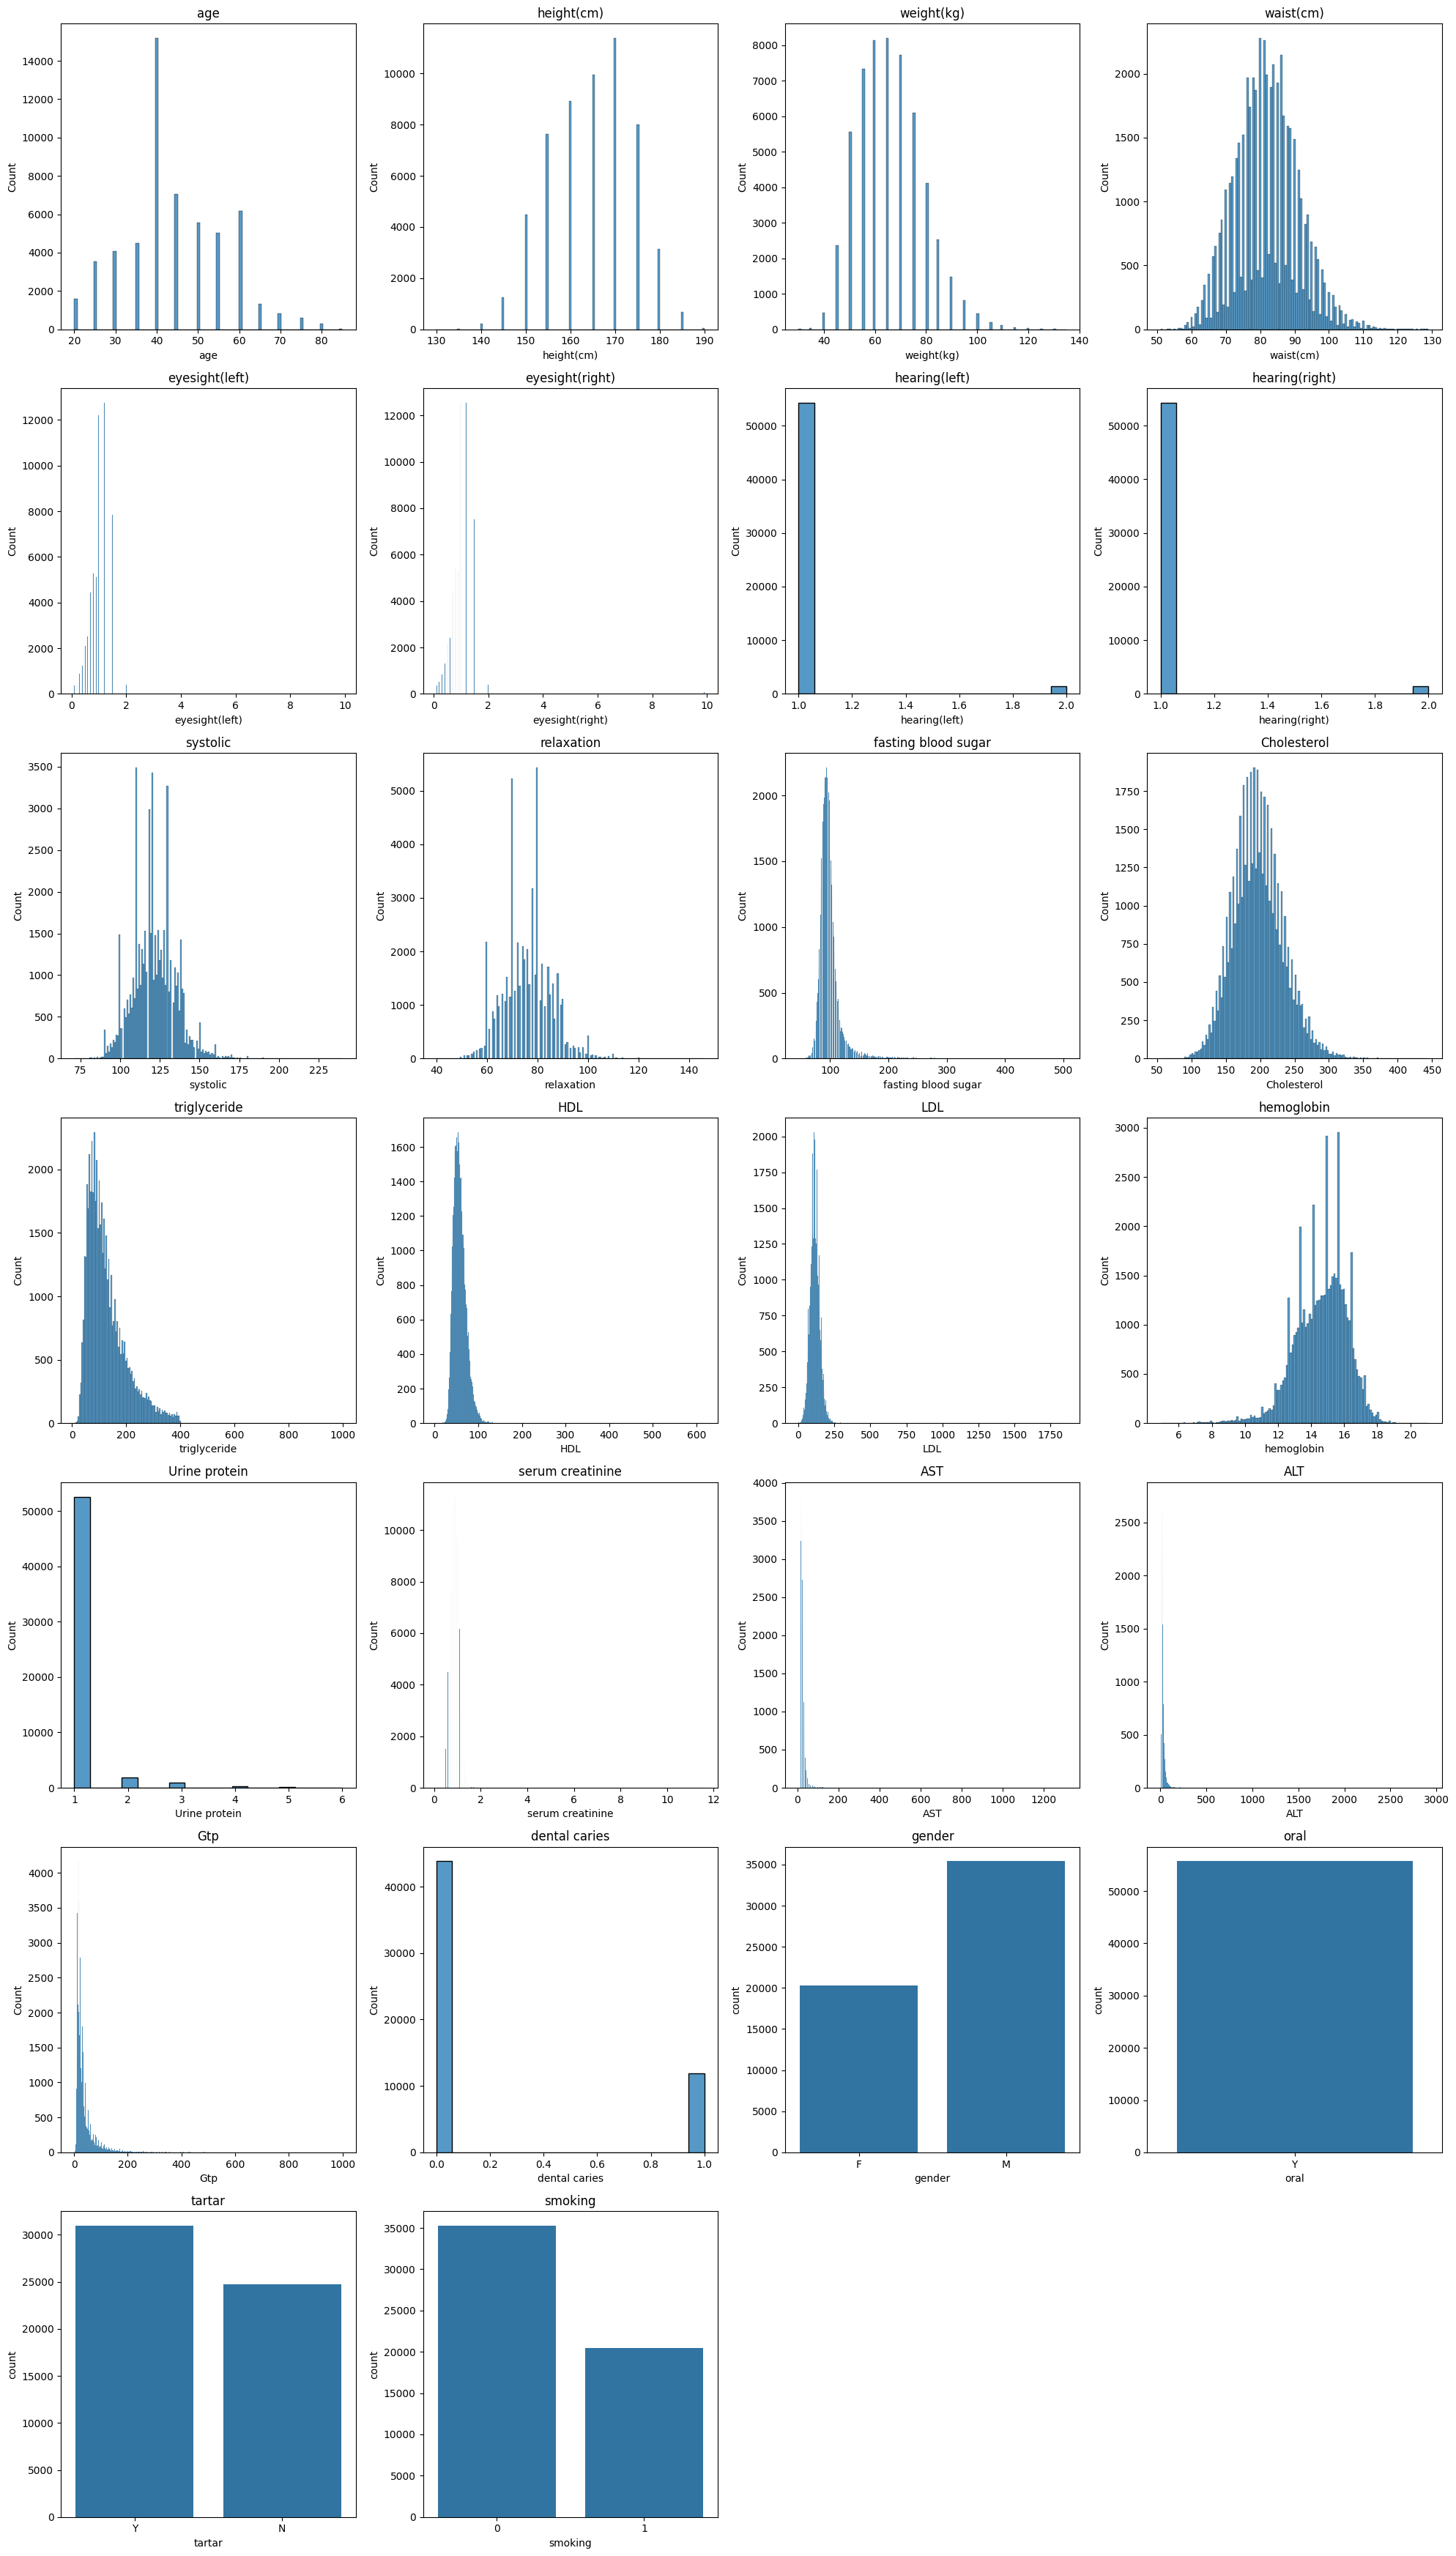

In [24]:
fig, axes = plt.subplots(7, 4, figsize=(20, 35))

# Numeric variables - histograms
numeric_vars = ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)',
                'hearing(left)', 'hearing(right)', 'systolic', 'relaxation', 'fasting blood sugar',
                'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
                'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries']

for i, var in enumerate(numeric_vars):
    sns.histplot(ax=axes[i // 4, i % 4], data=total_data, x=var)
    axes[i // 4, i % 4].set_title(var)

# Categorical variables - count plots
categorical_vars = ['gender', 'oral', 'tartar', 'smoking']

for i, var in enumerate(categorical_vars):
    sns.countplot(ax=axes[(len(numeric_vars) + i) // 4, (len(numeric_vars) + i) % 4], data=total_data, x=var)
    axes[(len(numeric_vars) + i) // 4, (len(numeric_vars) + i) % 4].set_title(var)

fig.delaxes(axes[6, 2])
fig.delaxes(axes[6, 3])
plt.tight_layout()
plt.show()

**Summary**: After running and visualizing the graphics, we slightly modify the data type meaning of our variables

Categorical:gender, oral, tartar, smoking, hearing(left), hearing(right), dental caries, Urine protein

Numerical: age, height(cm), weight(kg), waist(cm), eyesight(left), eyesight(right), systolic, relaxation, fasting blood sugar, Cholesterol, triglyceride, HDL, LDL, hemoglobin, serum creatinine, AST, ALT, Gtp


### Numerical vs Categorical

#### Numerical

In [25]:
numerical_vars = [
    'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)',
    'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL',
    'LDL', 'hemoglobin', 'serum creatinine', 'AST', 'ALT', 'Gtp'
]
total_data_num = numerical_vars

#### Categorical

In [26]:
categorical_vars = ['gender', 'oral', 'tartar', 'smoking', 'hearing(left)', 'hearing(right)', 'dental caries', 'Urine protein']
total_data_cv = categorical_vars


 ### Analysis of univariate variables

#### Analysis on categorical variables

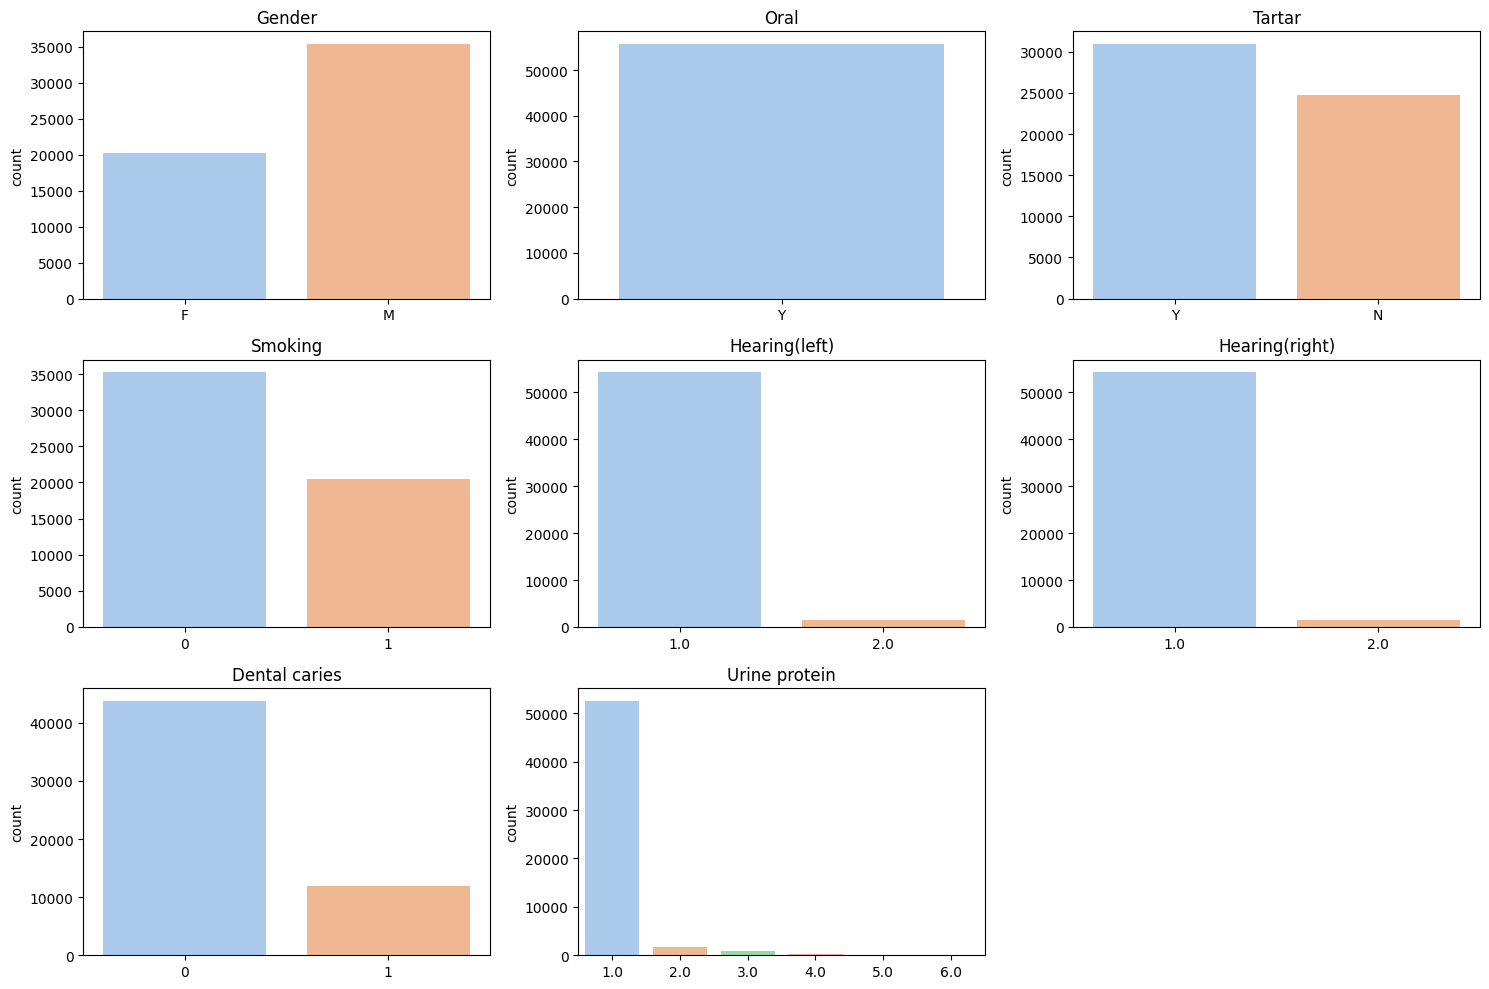

In [27]:
# Crear un gráfico de barras para cada variable categórica
plt.figure(figsize=(15, 10))
for i, var in enumerate(total_data_cv, 1):
    plt.subplot(3, 3, i)
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=FutureWarning)  # Ignorar FutureWarning
        sns.countplot(data=total_data, x=var, palette='pastel')
    plt.title(var.capitalize())
    plt.xlabel('')  # Eliminar etiqueta del eje x para mayor claridad

plt.tight_layout()
plt.show()


**Summary**:

 * Gender: There are Feminine and Masculine categories, and we observe a higher number of men.
 * Oral: All the data are affirmative (Yes).
 * Tartar: We observe a higher occurrence of dental problems (tartar).
 * Smoking: Within the dataset sample, the number of non-smokers is higher.
 * Hearing (left) + Hearing (right): Hearing is a binary variable, indicating normal hearing (1) or hearing difficulty (2); the majority have normal hearing.
 * Dental caries: This is a binary variable, indicating the absence of tooth decay (0) or presence of tooth decay (1); the majority show an absence of tooth decay.
 * Urine protein: The classification of urine protein into categories 1 to 6 generally refers to the proteinuria rating scale, with 1 indicating absence/minimal and 6 indicating maximum protein quantity.

#### Analysis on numeric variables

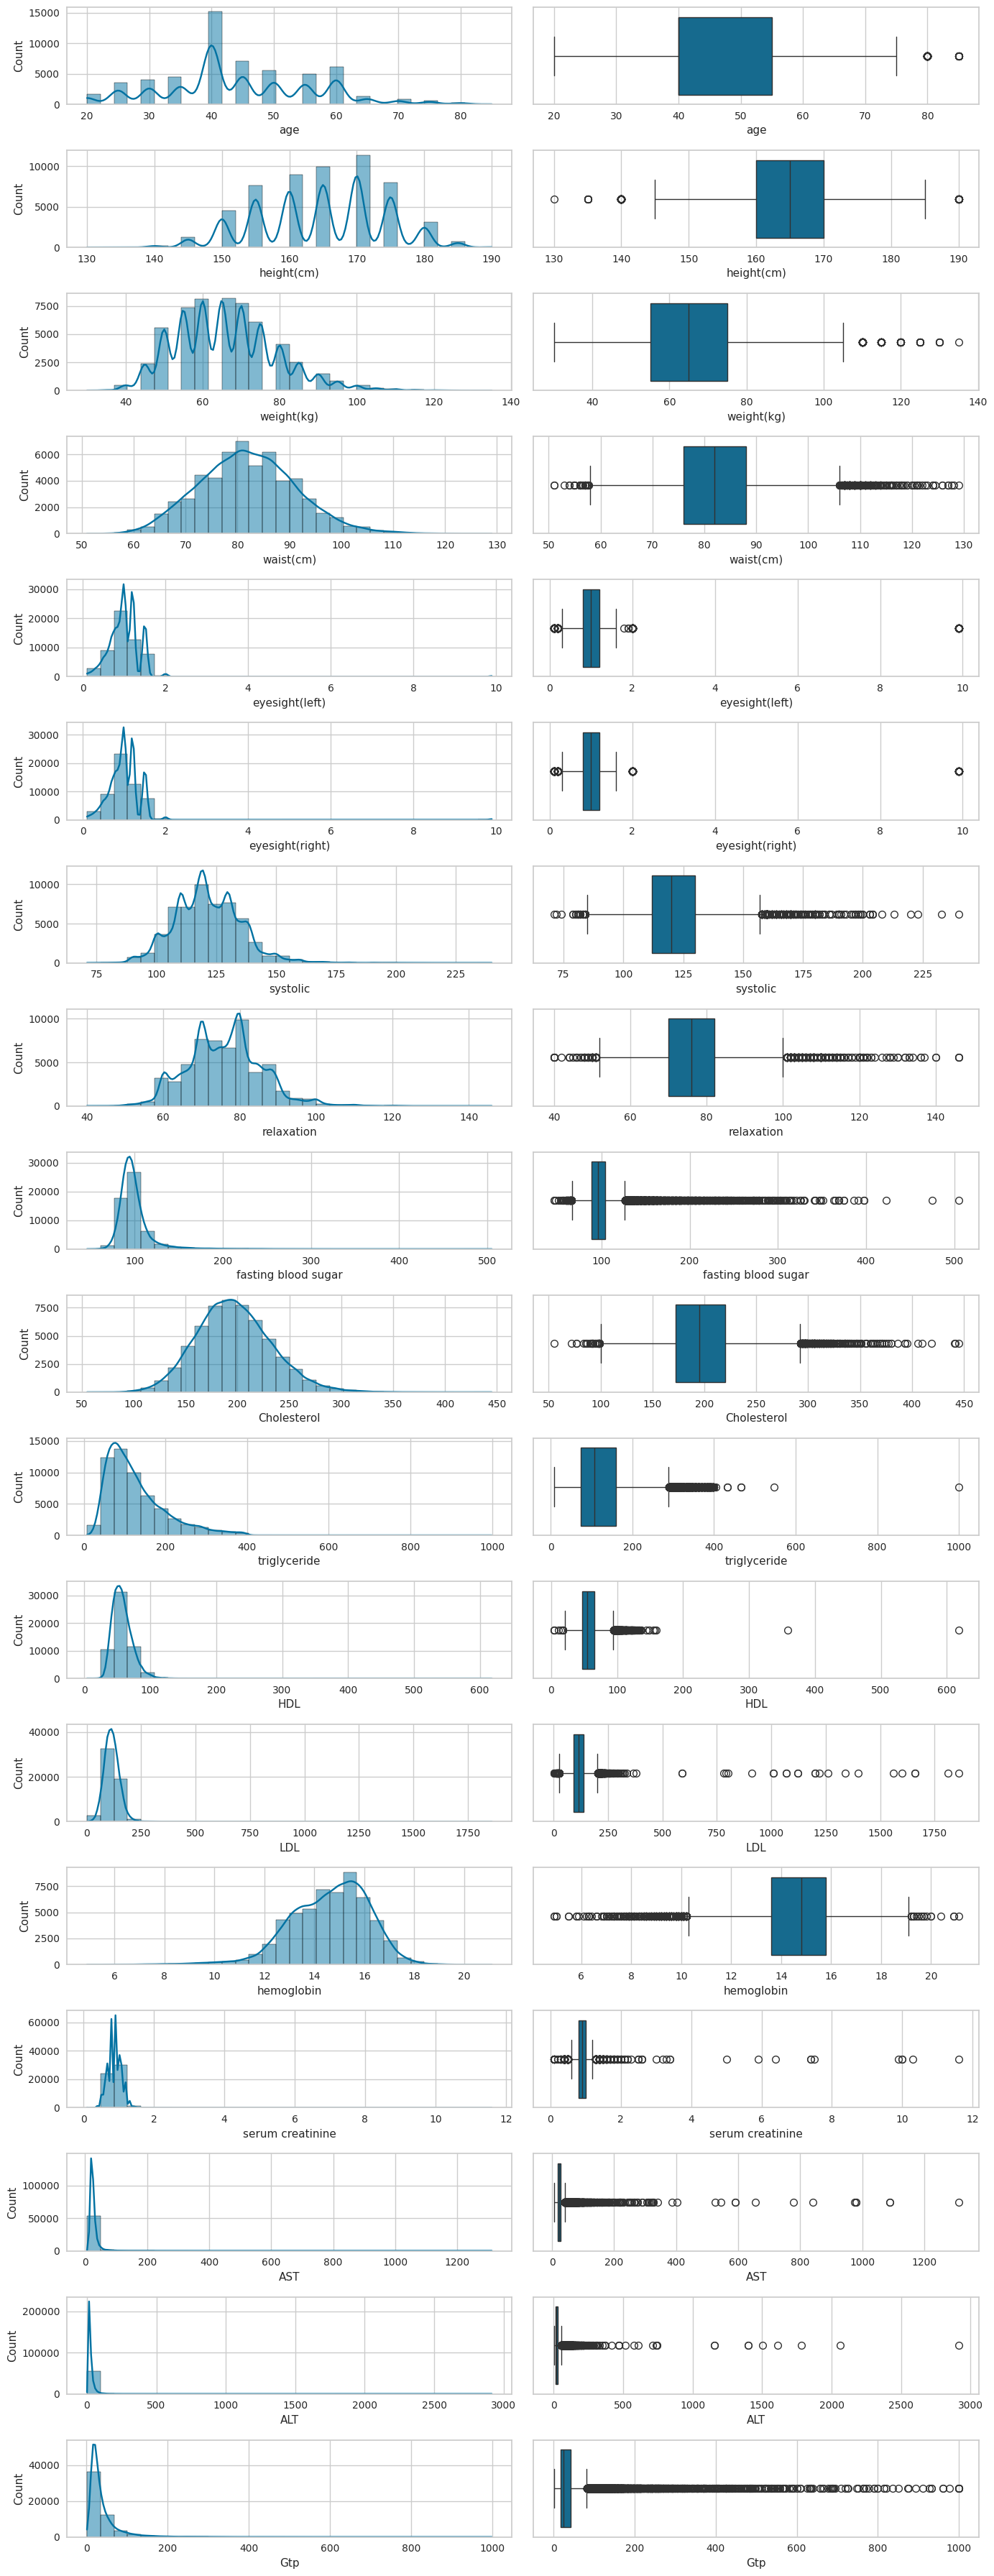

In [50]:
fig, axes = plt.subplots(18, 2, figsize=(14, 36))

# Histogramas y diagramas de caja para cada variable numérica
for i, variable in enumerate(numerical_vars):
    sns.histplot(data=total_data, x=variable, bins=30, kde=True, ax=axes[i, 0])
    sns.boxplot(data=total_data, x=variable, ax=axes[i, 1])
plt.tight_layout()
plt.show()


**Summary**:

In all variables, we conducted two graphical visualizations: one related to distribution and statistical characteristics.

The majority exhibit a normal distribution, but some show asymmetric distributions, such as GTP. Additionally, we observed outliers in all variables, particularly noteworthy is the presence of outliers in variables such as GTP, AST, ALT, and fasting blood sugar. We will address this in future steps, given the significant number of outliers, aiming to interpret whether these values are plausible for the variables or potential errors.

### Analysis of multivariate variables

#### Numerical-numerical analysis

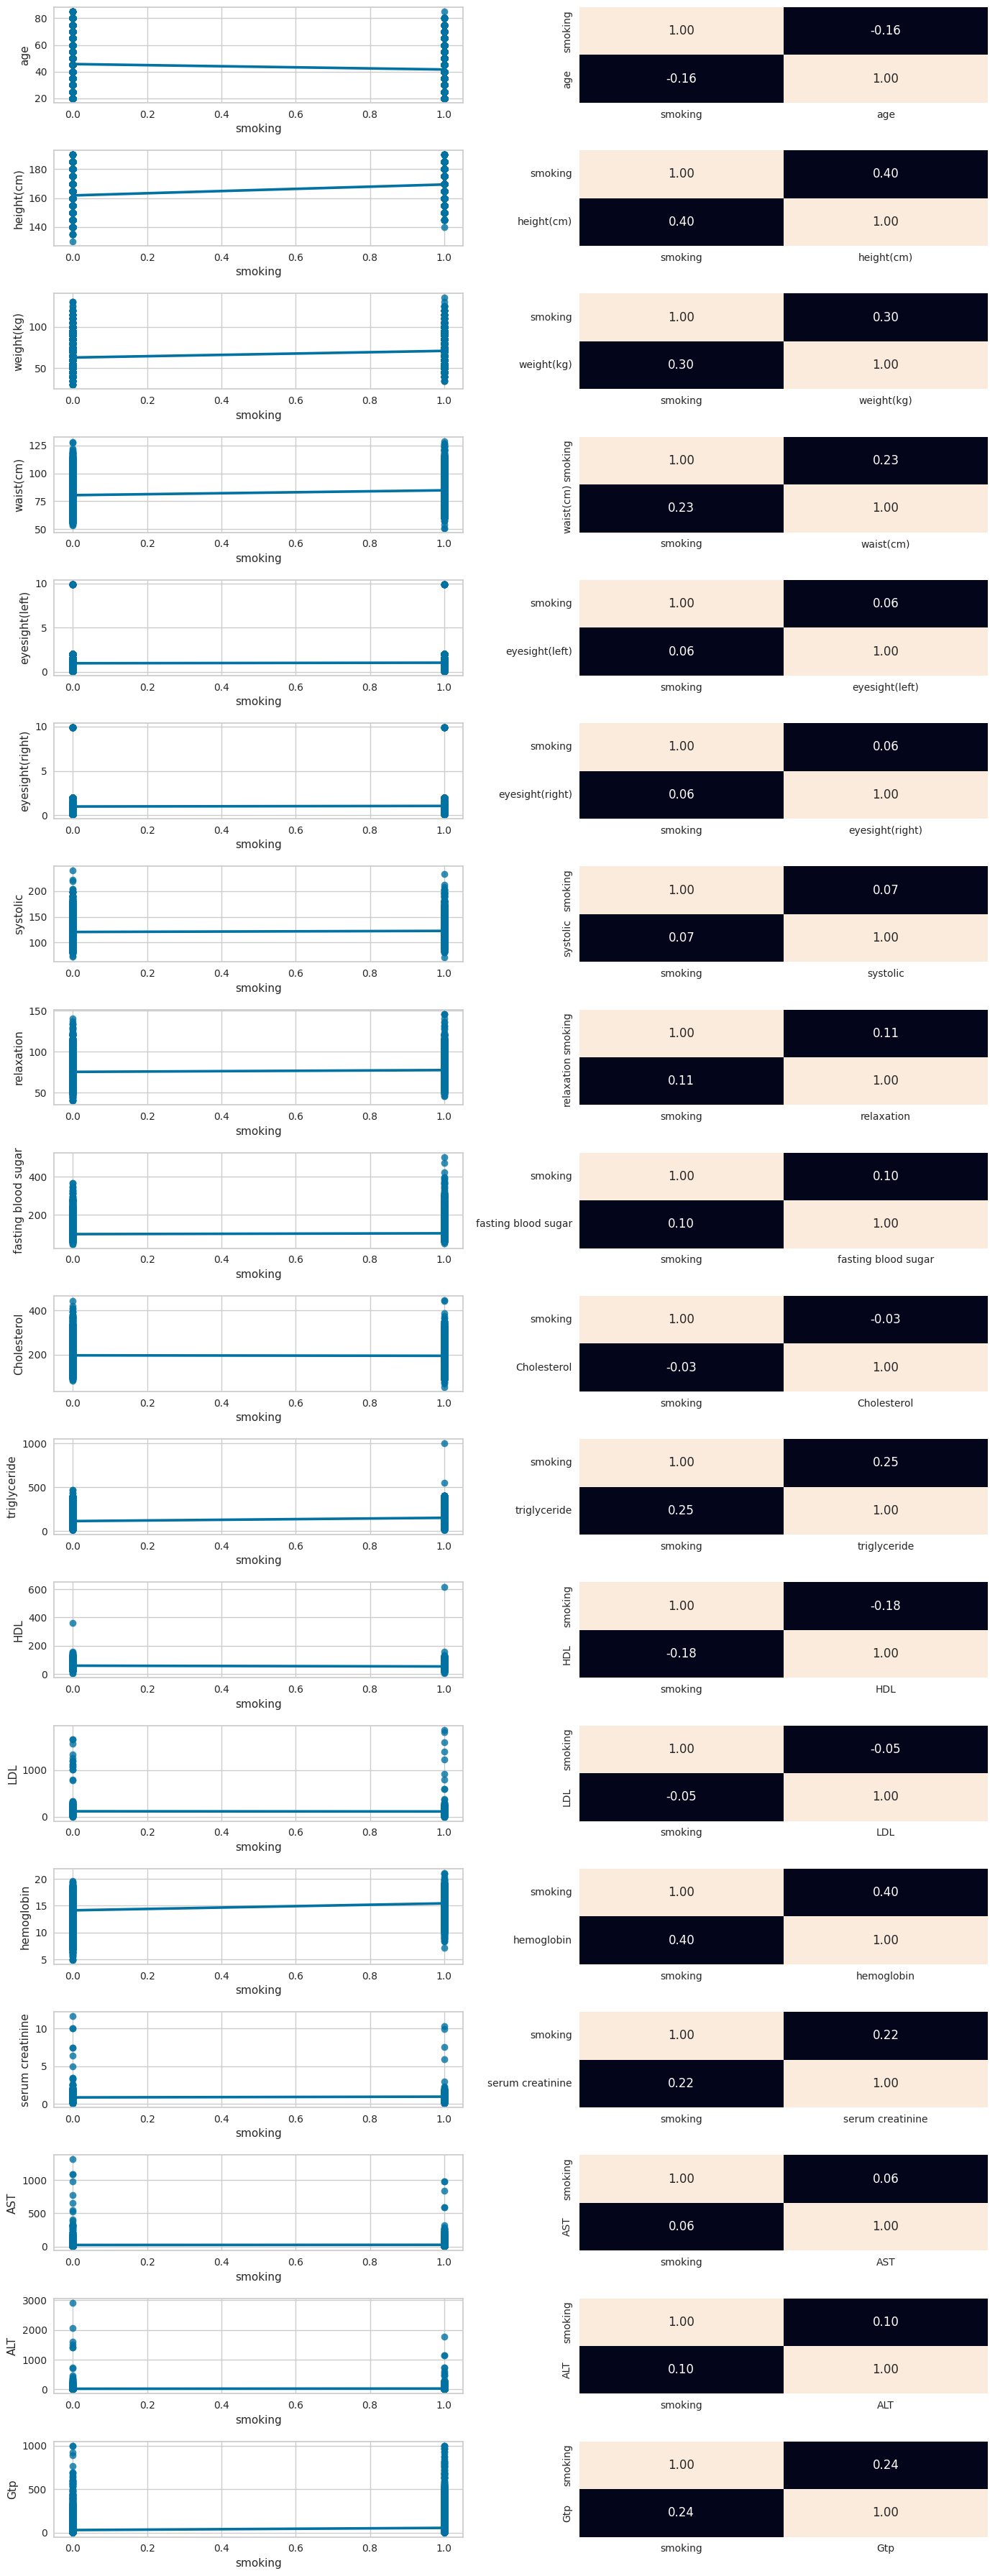

In [51]:
fig, axes = plt.subplots(18, 2, figsize=(14, 36))

# Realizar análisis numérico comparando 'smoking' con las otras variables
for i, variable in enumerate(total_data_num):
    # Gráfico de dispersión y mapa de calor de correlación
    sns.regplot(ax=axes[i, 0], data=total_data, x='smoking', y=variable)
    sns.heatmap(total_data[['smoking', variable]].corr(), annot=True, fmt=".2f", ax=axes[i, 1], cbar=False)
    axes[i, 1].set_ylabel(None)

plt.tight_layout()
plt.show()


**Summary**

**Smoking vs All Variables**

Strong Relation: This strong relationship suggests that smoking is more closely associated with gender, age, height (cm), weight (kg), elevated hemoglobin, GTP, ALT, HDL, serum creatinine, relaxation, fasting blood sugar, dental caries, and tartar. Only age and HDL have a negative relationship, indicating that fewer older people smoke and smokers tend to have lower values for HDL. The rest of the variables show a positive relationship, with elevated values observed in smokers

Not Strong Relation: eyesight(left), eyesight(right), systolic, Cholesterol, LDL, AST


#### categorical-categorical analysis

In [52]:
total_data_cv

['gender',
 'oral',
 'tartar',
 'smoking',
 'hearing(left)',
 'hearing(right)',
 'dental caries',
 'Urine protein']

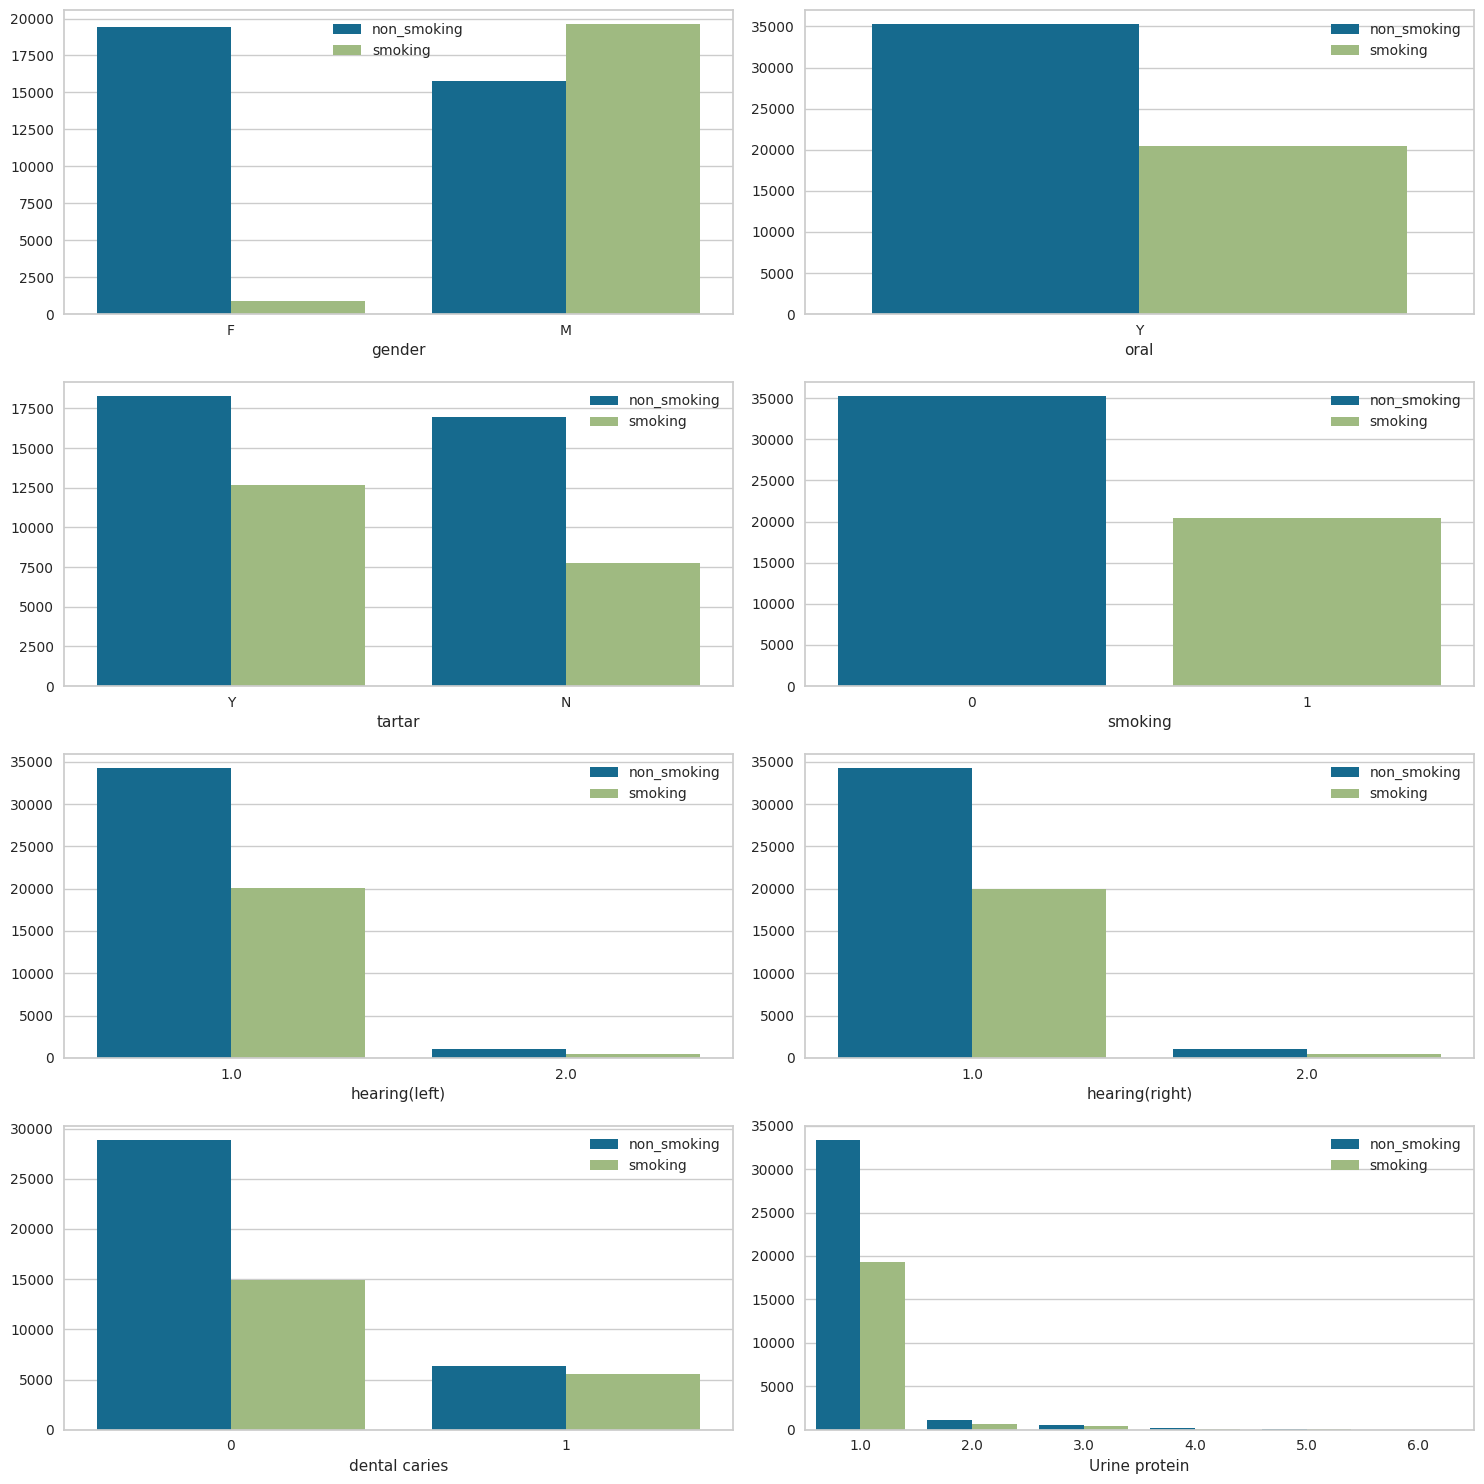

In [53]:
fig, axis = plt.subplots(4, 2, figsize=(15, 15))

# Crear gráficos para las variables categóricas
for i, var in enumerate(total_data_cv):
    sns.countplot(ax=axis[i // 2, i % 2], data=total_data, x=var, hue="smoking")
    axis[i // 2, i % 2].legend(labels=['non_smoking', 'smoking'])
    axis[i // 2, i % 2].set_ylabel(None)

plt.tight_layout()
plt.show()

**Summary**

 * Gender: We observe a higher number of smoking males.
 * Oral:  We notice more non-smokers with oral pathologies.
 * Tartar: Non-smokers exhibit fewer dental problems (tartar).
 * Hearing (left) + Hearing (right): Smoking individuals do not show auditory problems.
 * Dental caries: There is a higher number of non-smoking individuals with no tooth decay.
 * Urine protein: In all cases, non-smokers show a higher amount of proteinuria.

### Eliminate irrelevant information 2

Since Oral only has the category 'Yes,' it provides no variability to the model.

In [28]:
total_data.drop(['oral'], axis=1, inplace=True) # eliminar el total_data

In [29]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  object 
 1   age                  55692 non-null  int64  
 2   height(cm)           55692 non-null  int64  
 3   weight(kg)           55692 non-null  int64  
 4   waist(cm)            55692 non-null  float64
 5   eyesight(left)       55692 non-null  float64
 6   eyesight(right)      55692 non-null  float64
 7   hearing(left)        55692 non-null  float64
 8   hearing(right)       55692 non-null  float64
 9   systolic             55692 non-null  float64
 10  relaxation           55692 non-null  float64
 11  fasting blood sugar  55692 non-null  float64
 12  Cholesterol          55692 non-null  float64
 13  triglyceride         55692 non-null  float64
 14  HDL                  55692 non-null  float64
 15  LDL                  55692 non-null 

### Numerical-categorical analysis (Factorizar para correlacion)

In [30]:
###Factorizar la variable
total_data["gender"] = pd.factorize(total_data["gender"])[0]
total_data["tartar"] = pd.factorize(total_data["tartar"])[0]


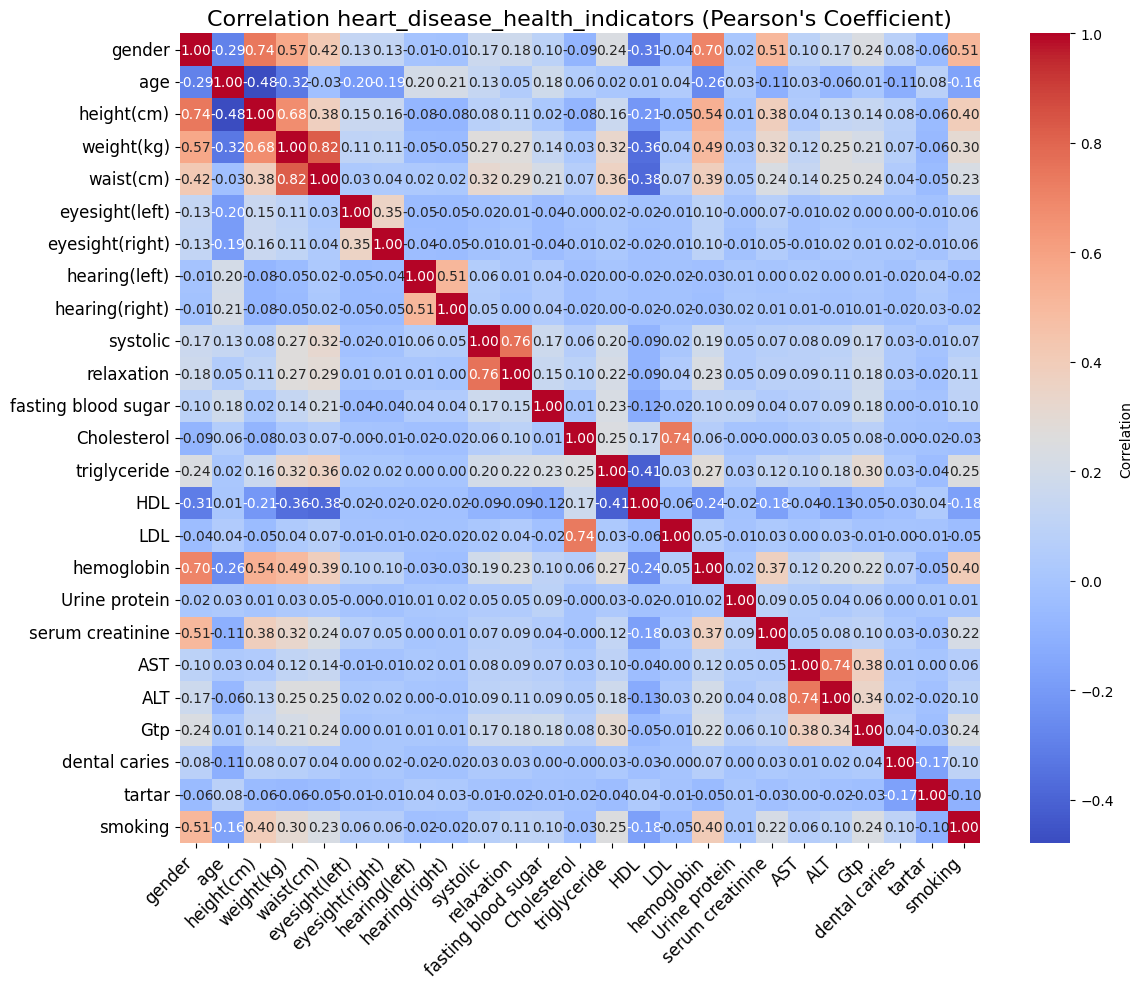

In [31]:
plt.figure(figsize=(12, 10))  # Ajustar el tamaño de la figura
plt.title("Correlation heart_disease_health_indicators (Pearson's Coefficient)", fontsize=16)  # Ajustar el tamaño de la fuente del título
corr = total_data.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': "Correlation"}, annot_kws={"size": 10})  # Formatear la anotación y elegir un mapa de color
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotar etiquetas del eje x y ajustar tamaño de fuente
plt.yticks(rotation=0, fontsize=12)  # Ajustar tamaño de fuente en el eje y
plt.tight_layout()  # Ajustar el diseño para evitar que se superpongan los elementos
plt.show()


**Summary Correlation** :


Variables with the highest positive correlation with smoking habit:

* Gender: Men show a higher tendency to smoke than women.
* Hemoglobin: Higher levels of hemoglobin are associated with smoking.
* Height: Smokers tend to be taller than non-smokers.
* Weight: Smokers tend to have a higher body weight than non-smokers.
* Triglycerides: Elevated triglyceride levels are linked to tobacco consumption.
* Waist: Greater waist circumference is related to smoking habit.
* GTP: Elevated levels of GTP (Guanosine triphosphate) are linked to smoking.
* Serum Creatinine: Smokers exhibit higher levels of serum creatinine.
* Relaxation: Greater perception of relaxation is associated with smoking habit.
* Dental Caries: Smokers are at a higher risk of dental caries.
* Fasting Glucose: Elevated fasting glucose levels are linked to smoking.
* ALT: Elevated ALT (alanine aminotransferase) levels are associated with tobacco consumption.
* Systolic: High systolic blood pressure is related to smoking habit.
* Acuity: Reduced visual acuity is associated with smoking.
* Urine Protein: Presence of urine protein is linked to tobacco consumption.
* AST: Elevated AST (aspartate aminotransferase) levels are associated with smoking.
* Age: Smoking habit is more prevalent in older individuals.
* HDL: Lower levels of HDL (high-density lipoprotein) are linked to smoking.

Variables with negative correlation with smoking habit:

* Tartar Teeth: Smokers have a lower number of teeth with tartar.

Variables with no great correlation with smoking habit:

* Eyes (right and left): Visual acuity does not show a clear relationship with smoking.
* Ears (right and left): Auditory capacity is not significantly affected by tobacco consumption.
* Cholesterol: No clear correlation is observed between total cholesterol and smoking habit.
* LDL: LDL (low-density lipoprotein) levels are not directly associated with smoking.

Correlation relationships excluding the 'Smoking' variable (threshold > 0.1 for positive correlations, threshold < -0.1 for negative correlations):
gender                 0.510340
hemoglobin             0.400678
height(cm)             0.396675
weight(kg)             0.302780
triglyceride           0.251799
Gtp                    0.236619
waist(cm)              0.226259
serum creatinine       0.216812
relaxation             0.108309
dental caries          0.103857
fasting blood sugar    0.100279
age                   -0.162557
HDL                   -0.178470
Name: smoking, dtype: float64


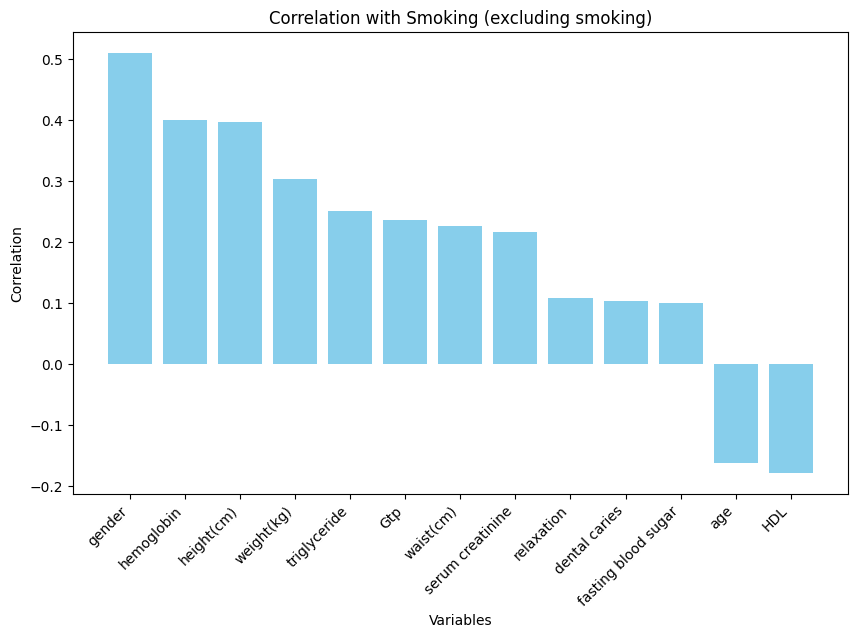

In [34]:
warnings.filterwarnings("ignore", category=FutureWarning)

# Set the correlation thresholds
correlation_threshold = 0.10
negative_correlation_threshold = -0.10

# Seleccionar solo las columnas numéricas para calcular la matriz de correlación
numeric_columns = total_data.select_dtypes(include=['int64', 'float64'])

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

# Calcular la correlación específica con la variable "Smoking"
smoking_correlation = correlation_matrix['smoking']

# Eliminar la variable "smoking" del DataFrame de correlaciones
smoking_relations_df = smoking_correlation.drop('smoking')

# Filtrar por el umbral de correlación positiva
positive_correlation_df = smoking_relations_df[smoking_relations_df > correlation_threshold]

# Filtrar por el umbral de correlación negativa
negative_correlation_df = smoking_relations_df[smoking_relations_df < negative_correlation_threshold]

# Combinar ambas listas de variables correlacionadas y ordenar de mayor a menor
most_correlated_vars = pd.concat([positive_correlation_df, negative_correlation_df]).sort_values(ascending=False)

# Filtrar el DataFrame total_data con las variables más correlacionadas
filtered_data = total_data[most_correlated_vars.index]

# Imprimir el DataFrame con las correlaciones excluyendo "smoking"
print(f"Correlation relationships excluding the 'Smoking' variable (threshold > {correlation_threshold} for positive correlations, threshold < {negative_correlation_threshold} for negative correlations):")

print(most_correlated_vars)

# Gráfico de barras para visualizar las correlaciones excluyendo "smoking"
plt.figure(figsize=(10, 6))
plt.bar(most_correlated_vars.index, most_correlated_vars.values, color='skyblue')
plt.xlabel('Variables')
plt.ylabel('Correlation')
plt.title('Correlation with Smoking (excluding smoking)')
plt.xticks(rotation=45, ha='right')
plt.show()


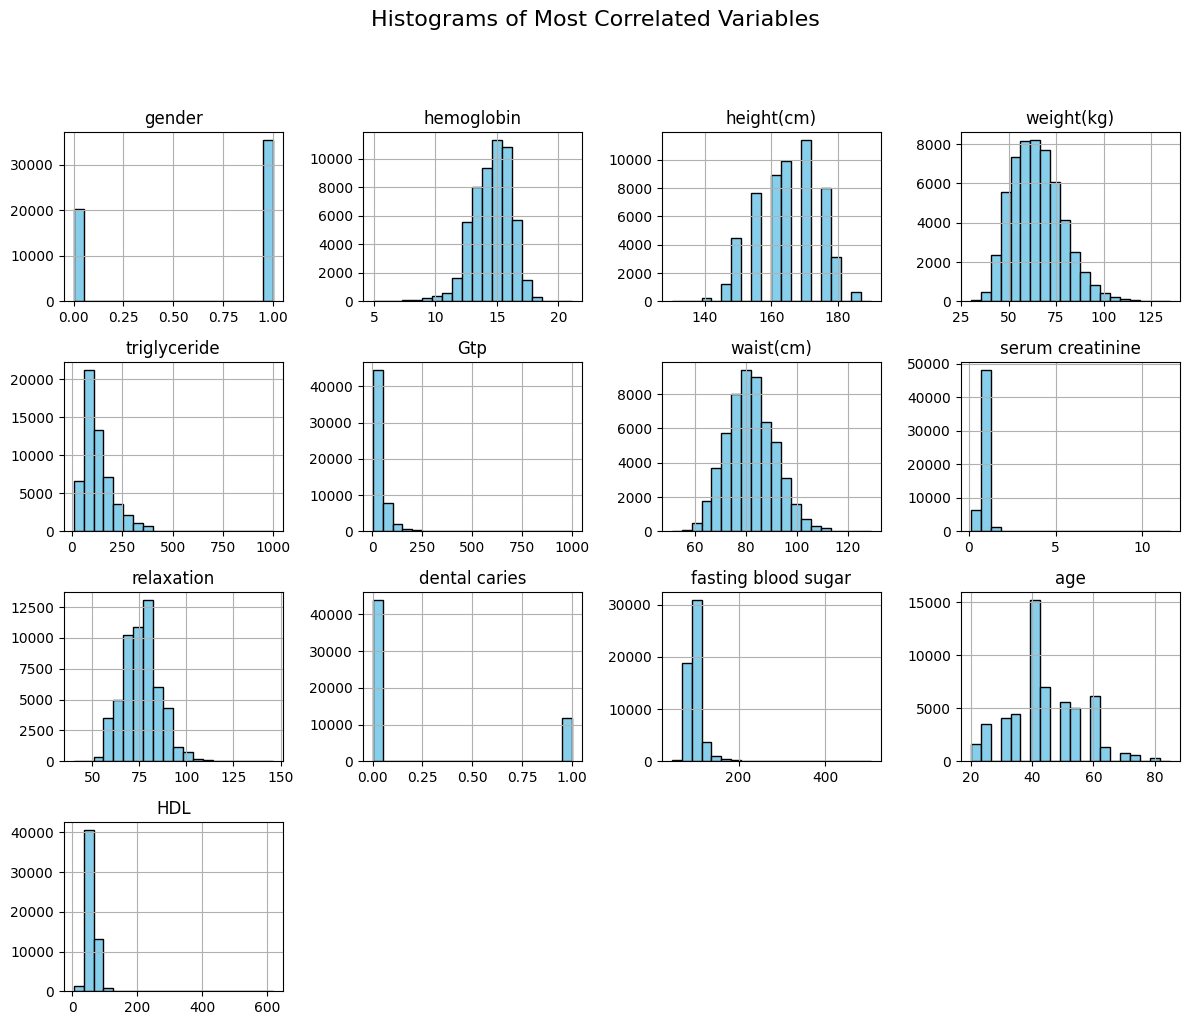

In [35]:
# Calcular la correlación específica con la variable "Smoking"
smoking_correlation = correlation_matrix['smoking']

# Eliminar la variable "smoking" del DataFrame de correlaciones
smoking_relations_df = smoking_correlation.drop('smoking')

# Filtrar por el umbral de correlación positiva
positive_correlation_df = smoking_relations_df[smoking_relations_df > correlation_threshold]

# Filtrar por el umbral de correlación negativa
negative_correlation_df = smoking_relations_df[smoking_relations_df < negative_correlation_threshold]

# Combinar ambas listas de variables correlacionadas y ordenar de mayor a menor
most_correlated_vars = pd.concat([positive_correlation_df, negative_correlation_df]).sort_values(ascending=False)

# Filtrar solo las variables que han pasado ambos umbrales
both_thresholds_df = most_correlated_vars[(most_correlated_vars > correlation_threshold) & (most_correlated_vars < negative_correlation_threshold)]

# Filtrar el DataFrame total_data con las variables más correlacionadas
filtered_data = total_data[most_correlated_vars.index]

# Plot histograms of the most correlated variables
filtered_data.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Most Correlated Variables', x=0.5, y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust layout to prevent overlap
plt.show()



**Conclusion Selection variables**:At the end, we decided to include all variables, believing each can contribute to the model(even there are some more correlated as others), as our research suggests association with smoking. Any removal will occur post initial model training, evaluating variable contributions. If irrelevant, they'll be eliminated.

## **Descriptive Statistics & Recall Point** 

In [36]:
# Crear una copia del DataFrame total_data excluyendo la variable "smoking"
total_data_c_no_smoking = total_data.drop(columns=['smoking'])
# Verificar el nuevo DataFrame
total_data_c_no_smoking.head()


,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar
0,0,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,73.0,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,0
1,0,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,42.0,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,0
2,1,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,55.0,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,1
3,1,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,45.0,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,0
4,0,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,62.0,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,1


## **Descriptive Statistics**
The following analysis allows us to observe the statistics of each variable such as minimum, maximum, mean, standard deviation, and quartiles. Additionally, this information allows us to analyze the presence of outliers, which can offer valuable insights into data quality and potential anomalies.

In [37]:
# descriptive statistics for percentiles
total_data_c_no_smoking.describe([0.05, 0.10, 0.25, 0.50, 0.75, 0.80, 0.90, 0.95, 0.99], include = np.number).T

,count,mean,std,min,5%,10%,25%,50%,75%,80%,90%,95%,99%,max
gender,55692.0,0.635657,0.481250,0.0,0.00,0.0,0.0,1.0,1.0,1.0,1.0,1.00,1.00,1.0
age,55692.0,44.182917,12.071418,20.0,25.00,30.0,40.0,40.0,55.0,55.0,60.0,65.00,75.00,85.0
height(cm),55692.0,164.649321,9.194597,130.0,150.00,150.0,160.0,165.0,170.0,175.0,175.0,180.00,185.00,190.0
weight(kg),55692.0,65.864936,12.820306,30.0,45.00,50.0,55.0,65.0,75.0,75.0,85.0,90.00,100.00,135.0
waist(cm),55692.0,82.046418,9.274223,51.0,67.00,70.0,76.0,82.0,88.0,90.0,94.0,98.00,105.00,129.0
eyesight(left),55692.0,1.012623,0.486873,0.1,0.40,0.6,0.8,1.0,1.2,1.2,1.5,1.50,1.50,9.9
eyesight(right),55692.0,1.007443,0.485964,0.1,0.40,0.6,0.8,1.0,1.2,1.2,1.5,1.50,1.50,9.9
hearing(left),55692.0,1.025587,0.157902,1.0,1.00,1.0,1.0,1.0,1.0,1.0,1.0,1.00,2.00,2.0
hearing(right),55692.0,1.026144,0.159564,1.0,1.00,1.0,1.0,1.0,1.0,1.0,1.0,1.00,2.00,2.0
systolic,55692.0,121.494218,13.675989,71.0,100.00,104.0,112.0,120.0,130.0,132.0,138.0,144.00,159.00,240.0


In [38]:
# descriptive statistics for numerical columns
numerical_statistics = total_data_c_no_smoking.describe(include = [np.number]).T
numerical_statistics

,count,mean,std,min,25%,50%,75%,max
gender,55692.0,0.635657,0.481250,0.0,0.0,1.0,1.0,1.0
age,55692.0,44.182917,12.071418,20.0,40.0,40.0,55.0,85.0
height(cm),55692.0,164.649321,9.194597,130.0,160.0,165.0,170.0,190.0
weight(kg),55692.0,65.864936,12.820306,30.0,55.0,65.0,75.0,135.0
waist(cm),55692.0,82.046418,9.274223,51.0,76.0,82.0,88.0,129.0
eyesight(left),55692.0,1.012623,0.486873,0.1,0.8,1.0,1.2,9.9
eyesight(right),55692.0,1.007443,0.485964,0.1,0.8,1.0,1.2,9.9
hearing(left),55692.0,1.025587,0.157902,1.0,1.0,1.0,1.0,2.0
hearing(right),55692.0,1.026144,0.159564,1.0,1.0,1.0,1.0,2.0
systolic,55692.0,121.494218,13.675989,71.0,112.0,120.0,130.0,240.0


In [41]:
#calculates the variation between the 99th percentile and the 25th percentile for each numeric column in the DataFrame
variation_field = numerical_statistics.values[:, 7]-numerical_statistics.values[:, 3]
variation_field

array([1.000e+00, 6.500e+01, 6.000e+01, 1.050e+02, 7.800e+01, 9.800e+00,
       9.800e+00, 1.000e+00, 1.000e+00, 1.690e+02, 1.060e+02, 4.590e+02,
       3.900e+02, 9.910e+02, 6.140e+02, 1.859e+03, 1.620e+01, 5.000e+00,
       1.150e+01, 1.305e+03, 2.913e+03, 9.980e+02, 1.000e+00, 1.000e+00])

In [42]:
#calculating the difference between the third quartile (Q3) and the first quartile (Q1) for each numeric column in the DataFrame
iq_distance = numerical_statistics.values[:, 6]--numerical_statistics.values[:, 4]
iq_distance

array([  1. ,  95. , 330. , 130. , 164. ,   2. ,   2. ,   2. ,   2. ,
       242. , 152. , 193. , 392. , 234. , 113. , 228. ,  29.4,   2. ,
         1.8,  47. ,  46. ,  60. ,   0. ,   1. ])

In [43]:
numerical_statistics["variation_field"] = variation_field

In [44]:
numerical_statistics["iq_distance"] = iq_distance

In [45]:
numerical_statistics

,count,mean,std,min,25%,50%,75%,max,variation_field,iq_distance
gender,55692.0,0.635657,0.481250,0.0,0.0,1.0,1.0,1.0,1.0,1.0
age,55692.0,44.182917,12.071418,20.0,40.0,40.0,55.0,85.0,65.0,95.0
height(cm),55692.0,164.649321,9.194597,130.0,160.0,165.0,170.0,190.0,60.0,330.0
weight(kg),55692.0,65.864936,12.820306,30.0,55.0,65.0,75.0,135.0,105.0,130.0
waist(cm),55692.0,82.046418,9.274223,51.0,76.0,82.0,88.0,129.0,78.0,164.0
eyesight(left),55692.0,1.012623,0.486873,0.1,0.8,1.0,1.2,9.9,9.8,2.0
eyesight(right),55692.0,1.007443,0.485964,0.1,0.8,1.0,1.2,9.9,9.8,2.0
hearing(left),55692.0,1.025587,0.157902,1.0,1.0,1.0,1.0,2.0,1.0,2.0
hearing(right),55692.0,1.026144,0.159564,1.0,1.0,1.0,1.0,2.0,1.0,2.0
systolic,55692.0,121.494218,13.675989,71.0,112.0,120.0,130.0,240.0,169.0,242.0


## **Feature engineering**

**Outlier analysis**: It was observed that there are a large number of outliers in the numerical variables, they were cleaned. Using a combination of internet documentation and first-hand working knowledge, we delimited the outliers.

In [46]:
total_data_c_no_smoking.head(5)

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar
0,0,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,73.0,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,0
1,0,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,42.0,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,0
2,1,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,55.0,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,1
3,1,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,45.0,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,0
4,0,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,62.0,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,1


In [47]:
total_data_c_no_smoking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  int64  
 1   age                  55692 non-null  int64  
 2   height(cm)           55692 non-null  int64  
 3   weight(kg)           55692 non-null  int64  
 4   waist(cm)            55692 non-null  float64
 5   eyesight(left)       55692 non-null  float64
 6   eyesight(right)      55692 non-null  float64
 7   hearing(left)        55692 non-null  float64
 8   hearing(right)       55692 non-null  float64
 9   systolic             55692 non-null  float64
 10  relaxation           55692 non-null  float64
 11  fasting blood sugar  55692 non-null  float64
 12  Cholesterol          55692 non-null  float64
 13  triglyceride         55692 non-null  float64
 14  HDL                  55692 non-null  float64
 15  LDL                  55692 non-null 

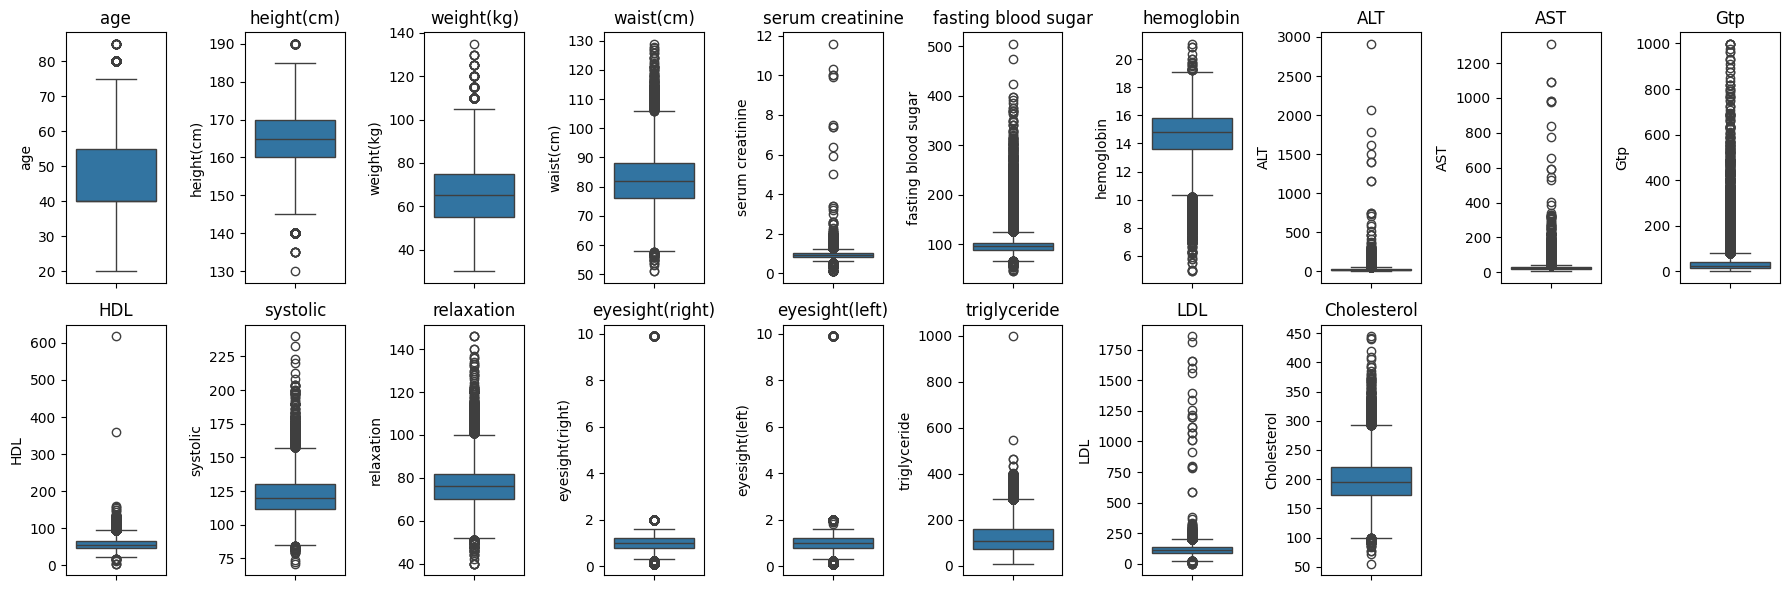

In [48]:
# Crear una figura con subgráficos
fig, axis = plt.subplots(2, 10, figsize=(18, 6))

# Boxplots para cada variable
for i, variable in enumerate([ 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'serum creatinine', 'fasting blood sugar','hemoglobin', "ALT",'AST','Gtp',  'HDL',  'systolic', 'relaxation', 'eyesight(right)', 'eyesight(left)','triglyceride', 'LDL',"Cholesterol"]):
    sns.boxplot(data=total_data_c_no_smoking[variable], ax=axis[i//10, i%10])
    axis[i//10, i%10].set_title(variable)  # Establecer título para cada boxplot

fig.delaxes(axis[1, 8])
fig.delaxes(axis[1, 9])

plt.tight_layout()
plt.show()



**Summary Features**
Utilizing a combination of internet documentation and first-hand working knowledge, we delimited the outliers.


 * **hemoglobin**:Normal level:  11.2 mg/dL - 15.7 mg/dL, 
            Possible Range: 7.4 mg/dL - 18.7 mg/dL

           
 * **Height(cm)**:Normal level:  145 cm  - 1.85 cm, 
            Possible Range: 100 cm - 230 cm

 * **weight(kg)**:Normal level:  110 Kg  - 45 Kg, 
            Possible Range: 35 Kg - 300 Kg
           
 * **triglyceride**: Normal level:  <150 mg/dL 
            Possible Range: 31 mg/dL - 1029 mg/dL


 * **Gtp**:Normal level:  between 10 U/L - 30 U/L
            Possible Range: 1 U/L - 996 U/L

 * **waist(cm)Circumference**:
   Low risk: < 94 cm;
   High risk: 94-102 cm;
   Very high risk: > 102 cm for men
   and Low risk: < 80 cm,
   High risk: 80-88 cm,
   Very high risk: > 88 cm

 * **serum creatinine**:Normal level:  0.5 mg/dL - 0.9 mg/dL, 
            Possible Range: 0.27 mg/dL - 6.81 mg/dL, 


 * **relaxation**: less than 80 mm Hg, at Risk (prehypertension) 80–89 mm Hg, high Blood Pressure (hypertension) 90 mm Hg or higher.               
 * **fasting blood sugar**:  Normal level: < 100 mg/dL, from 100 to 125 mg/dL prediabetes. If it's 126 mg/dL or higher diabetes

 * **ALT**: Normal level:  between 10 U/L - 30 U/L
            Possible Range: 1 U/L - 996 U/L


 * **systolic** : Normal less than 120 mm Hg;
   At Risk (prehypertension) 120–139 mm Hg
   High Blood Pressure (hypertension) 140 mm Hg or higher.

 * **eyesight(right-left)**: Visual acuity expressed in decimal: 1.0 means the average vision, 2.0 is the highest possible value and indicates very sharp, way above-average vision             
 * **AST**:Normal level:  between 10 U/L - 50 U/L
            Possible Range: 600 U/L - 1543 U/L

 * **Cholesterol**:Normal level:  >200 mg/dL
            Possible Range: 300 mg/dL - 700 mg/dL

 * **LDL**:Normal level:  70 mg/dL - 115 mg/dL, 
            Possible Range: 300 mg/dL - 700 mg/dL

 * **age**:0 - 100 
                  
 * **HDL**: Normal level:  20 mg/dL - 100 mg/dL, 
            Possible Range: 300 mg/dL - 700 mg/dL                  

### Delete outliers
The outliers were deleted take account the normal range and the medical range expected for each of the variables.

In [49]:
#GTP
Gtp = total_data_c_no_smoking["Gtp"].describe()
Gtp
Gtp_iqr = Gtp["75%"] - Gtp["25%"]
upper_limit = Gtp["75%"] + 1.5 * Gtp_iqr
lower_limit = Gtp["25%"] - 1.5 * Gtp_iqr
print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(Gtp_iqr, 2)}")
total_data_c_no_smoking=total_data_c_no_smoking[total_data_c_no_smoking["Gtp"] < 700]


Los límites superior e inferior para la búsqueda de outliers son 82.0 y -22.0, con un rango intercuartílico de 26.0


In [50]:
#ALT
ALT = total_data_c_no_smoking["ALT"].describe()
ALT_iqr = ALT["75%"] - ALT["25%"]
upper_limit = ALT["75%"] + 1.5 * ALT_iqr
lower_limit = ALT["25%"] - 1.5 * ALT_iqr
print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(ALT_iqr, 2)}")
total_data_c_no_smoking = total_data_c_no_smoking[total_data_c_no_smoking["ALT"] < 1000]


Los límites superior e inferior para la búsqueda de outliers son 55.0 y -9.0, con un rango intercuartílico de 16.0


In [51]:
#height_cm
height_cm = total_data_c_no_smoking["height(cm)"].describe()
height_cm_iqr = height_cm["75%"] - height_cm["25%"]
upper_limit = height_cm["75%"] + 1.5 * height_cm_iqr
lower_limit = height_cm["25%"] - 1.5 * height_cm_iqr
print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(height_cm_iqr, 2)}")
total_data_c_no_smoking = total_data_c_no_smoking[(total_data_c_no_smoking["height(cm)"] >= 145) & (total_data_c_no_smoking["height(cm)"] <= 185)]


Los límites superior e inferior para la búsqueda de outliers son 185.0 y 145.0, con un rango intercuartílico de 10.0


In [52]:
#triglyceride
triglyceride_stats = total_data_c_no_smoking["triglyceride"].describe()
triglyceride_iqr = triglyceride_stats["75%"] - triglyceride_stats["25%"]
upper_limit = triglyceride_stats["75%"] + 1.5 * triglyceride_iqr
lower_limit = triglyceride_stats["25%"] - 1.5 * triglyceride_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers en triglyceride son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(triglyceride_iqr, 2)}")

total_data_c_no_smoking = total_data_c_no_smoking[(total_data_c_no_smoking["triglyceride"] >= lower_limit) & (total_data_c_no_smoking["triglyceride"] < 500)]




Los límites superior e inferior para la búsqueda de outliers en triglyceride son 289.0 y -55.0, con un rango intercuartílico de 86.0


In [53]:
#HDL
hdl_stats = total_data_c_no_smoking["HDL"].describe()
hdl_iqr = hdl_stats["75%"] - hdl_stats["25%"]
upper_limit = hdl_stats["75%"] + 1.5 * hdl_iqr
lower_limit = hdl_stats["25%"] - 1.5 * hdl_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers en HDL son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(hdl_iqr, 2)}")

total_data_c_no_smoking = total_data_c_no_smoking[(total_data_c_no_smoking["HDL"] >= lower_limit) & (total_data_c_no_smoking["HDL"] < 200)]



Los límites superior e inferior para la búsqueda de outliers en HDL son 94.5 y 18.5, con un rango intercuartílico de 19.0


In [54]:
#fasting_blood_sugar
fasting_blood_sugar = total_data_c_no_smoking["fasting blood sugar"].describe()
fasting_blood_sugar_iqr = fasting_blood_sugar["75%"] - fasting_blood_sugar["25%"]
upper_limit = fasting_blood_sugar["75%"] + 1.5 * fasting_blood_sugar_iqr
lower_limit = fasting_blood_sugar["25%"] - 1.5 * fasting_blood_sugar_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(fasting_blood_sugar_iqr, 2)}")

total_data_c_no_smoking = total_data_c_no_smoking[total_data_c_no_smoking["fasting blood sugar"] < 400]


Los límites superior e inferior para la búsqueda de outliers son 126.5 y 66.5, con un rango intercuartílico de 15.0


In [55]:
#creatine
creatinine_stats = total_data_c_no_smoking["serum creatinine"].describe()
creatinine_iqr = creatinine_stats["75%"] - creatinine_stats["25%"]
upper_limit = creatinine_stats["75%"] + 1.5 * creatinine_iqr
lower_limit = creatinine_stats["25%"] - 1.5 * creatinine_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers en serum creatinine son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(creatinine_iqr, 2)}")

total_data_c_no_smoking = total_data_c_no_smoking[(total_data_c_no_smoking["serum creatinine"] >= lower_limit) & (total_data_c_no_smoking["serum creatinine"] < 4)]

Los límites superior e inferior para la búsqueda de outliers en serum creatinine son 1.3 y 0.5, con un rango intercuartílico de 0.2


In [56]:
#Systolic
systolic_stats = total_data_c_no_smoking["systolic"].describe()
systolic_iqr = systolic_stats["75%"] - systolic_stats["25%"]
upper_limit = systolic_stats["75%"] + 1.5 * systolic_iqr
lower_limit = systolic_stats["25%"] - 1.5 * systolic_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers en serum creatinine son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(systolic_iqr, 2)}")

total_data_c_no_smoking = total_data_c_no_smoking[(total_data_c_no_smoking["systolic"] >= lower_limit) & (total_data_c_no_smoking["systolic"] <= 200)]

Los límites superior e inferior para la búsqueda de outliers en serum creatinine son 157.0 y 85.0, con un rango intercuartílico de 18.0


In [57]:
#Eyesight: Left and right
eyesight_left_stats = total_data_c_no_smoking["eyesight(left)"].describe()
eyesight_right_stats = total_data_c_no_smoking["eyesight(right)"].describe()

eyesight_left_iqr = eyesight_left_stats["75%"] - eyesight_left_stats["25%"]
eyesight_right_iqr = eyesight_right_stats["75%"] - eyesight_right_stats["25%"]

upper_limit_left = eyesight_left_stats["75%"] + 1.5 * eyesight_left_iqr
lower_limit_left = eyesight_left_stats["25%"] - 1.5 * eyesight_left_iqr

upper_limit_right = eyesight_right_stats["75%"] + 1.5 * eyesight_right_iqr
lower_limit_right = eyesight_right_stats["25%"] - 1.5 * eyesight_right_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers en eyesight(left) son {round(upper_limit_left, 2)} y {round(lower_limit_left, 2)}, con un rango intercuartílico de {round(eyesight_left_iqr, 2)}")
print(f"Los límites superior e inferior para la búsqueda de outliers en eyesight(right) son {round(upper_limit_right, 2)} y {round(lower_limit_right, 2)}, con un rango intercuartílico de {round(eyesight_right_iqr, 2)}")

total_data_c_no_smoking = total_data_c_no_smoking[(total_data_c_no_smoking["eyesight(left)"] >= lower_limit_left) & (total_data_c_no_smoking["eyesight(left)"] <= 2.1) & (total_data_c_no_smoking["eyesight(right)"] >= lower_limit_right) & (total_data_c_no_smoking["eyesight(right)"] <= 2.1)]


Los límites superior e inferior para la búsqueda de outliers en eyesight(left) son 1.8 y 0.2, con un rango intercuartílico de 0.4
Los límites superior e inferior para la búsqueda de outliers en eyesight(right) son 1.8 y 0.2, con un rango intercuartílico de 0.4


In [58]:
#AST
AST_stats = total_data_c_no_smoking["AST"].describe()
AST_iqr =  AST_stats["75%"] -  AST_stats["25%"]
upper_limit =  AST_stats["75%"] + 1.5 *  AST_iqr
lower_limit =  AST_stats["25%"] - 1.5 *  AST_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers en serum creatinine son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(AST_iqr, 2)}")

total_data_c_no_smoking = total_data_c_no_smoking[(total_data_c_no_smoking["AST"] >= lower_limit) & (total_data_c_no_smoking["AST"] <= 400)]

Los límites superior e inferior para la búsqueda de outliers en serum creatinine son 44.0 y 4.0, con un rango intercuartílico de 10.0


In [59]:
#LDL
LDL_stats = total_data_c_no_smoking["LDL"].describe()
LDL_iqr = LDL_stats["75%"] - LDL_stats["25%"]

upper_limit = LDL_stats["75%"] + 1.5 * LDL_iqr
lower_limit = LDL_stats["25%"] - 1.5 * LDL_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers en LDL son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(LDL_iqr, 2)}")

total_data_c_no_smoking = total_data_c_no_smoking[(total_data_c_no_smoking["LDL"] >= lower_limit) & (total_data_c_no_smoking["LDL"] <= 200)]


Los límites superior e inferior para la búsqueda de outliers en LDL son 202.0 y 26.0, con un rango intercuartílico de 44.0


In [60]:
# Cholesterol
cholesterol_stats = total_data_c_no_smoking["Cholesterol"].describe()
cholesterol_iqr = cholesterol_stats["75%"] - cholesterol_stats["25%"]
upper_limit = cholesterol_stats["75%"] + 1.5 * cholesterol_iqr
lower_limit = cholesterol_stats["25%"] - 1.5 * cholesterol_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers en Cholesterol son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(cholesterol_iqr, 2)}")

total_data_c_no_smoking = total_data_c_no_smoking[(total_data_c_no_smoking["Cholesterol"] >= 70) & (total_data_c_no_smoking["Cholesterol"] <= 350)]


Los límites superior e inferior para la búsqueda de outliers en Cholesterol son 289.5 y 101.5, con un rango intercuartílico de 47.0


In [61]:
# Supongamos que df es tu DataFrame original
# Número de filas antes de eliminar
num_filas_antes = total_data.shape[0]
# Aplicar alguna operación para eliminar filas, por ejemplo:
# Número de filas después de eliminar
num_filas_despues = total_data_c_no_smoking.shape[0]
# Calcular el número de filas eliminadas
num_filas_eliminadas = num_filas_antes - num_filas_despues
print("Número de filas eliminadas:", num_filas_eliminadas)

# Número de filas en total_data
total_data_rows = 55692

# Número de filas en total_data_c_no_smoking
total_data_c_no_smoking_rows = 51407

# Calcular la diferencia porcentual
percentage_difference = ((total_data_rows - total_data_c_no_smoking_rows) / total_data_rows) * 100

print("Diferencia Porcentual:", percentage_difference, "%")

Número de filas eliminadas: 4285
Diferencia Porcentual: 7.694103282338577 %


### Visualize the new Outliers

**Conclusion Outliers**:The following boxplots show the variables with the cleaning of the extreme outliers. Some outliers were maintained because they correspond to extreme values but within the possible ranges for each of the variables. It is observed that after cleaning there is a loss of data of 7'7% (4285 rows), but considering the volume of the dataset this was done so as not to incorporate that volume of erroneous data into the model.

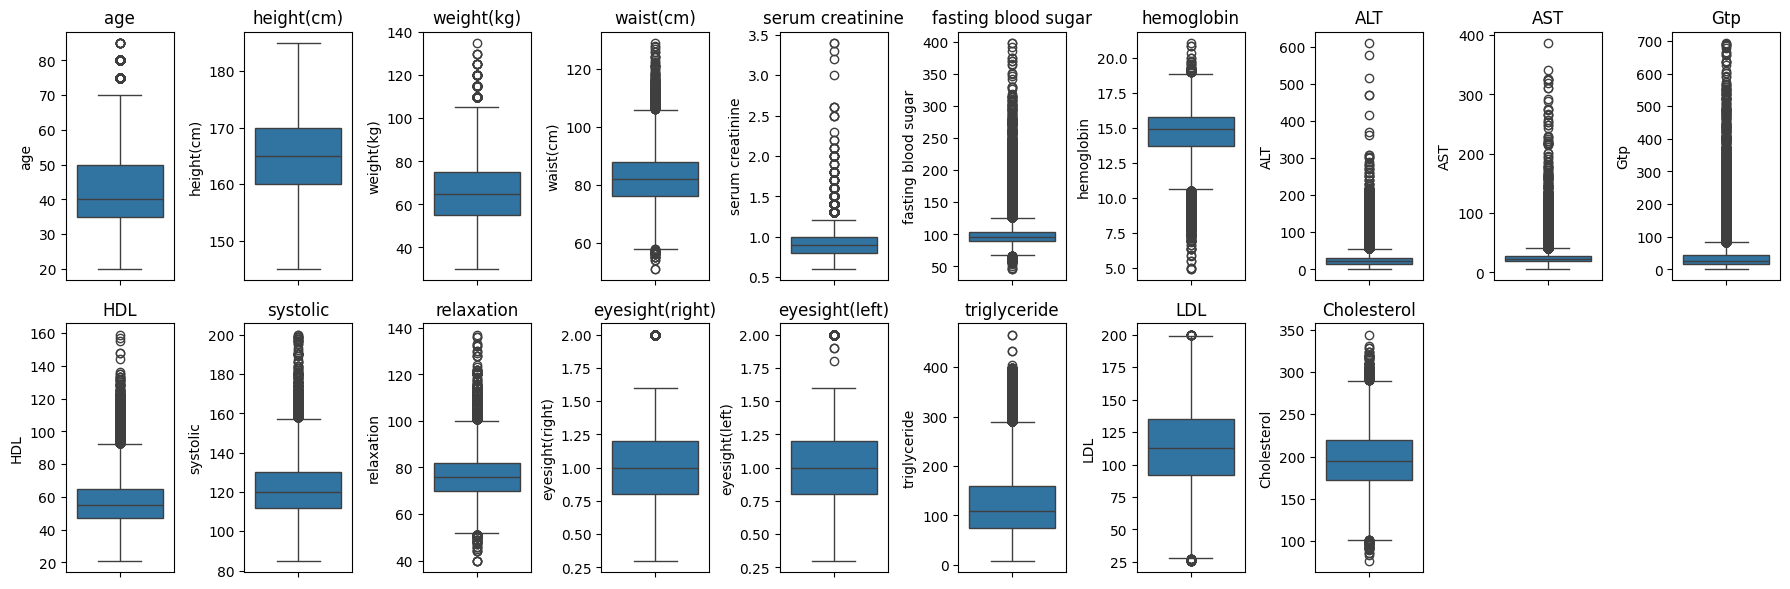

In [62]:
# Crear una figura con subgráficos
fig, axis = plt.subplots(2, 10 , figsize=(18, 6))

# Boxplots para cada variable
for i, variable in enumerate([ 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'serum creatinine', 'fasting blood sugar','hemoglobin', "ALT",'AST','Gtp',  'HDL',  'systolic', 'relaxation', 'eyesight(right)', 'eyesight(left)','triglyceride', 'LDL',"Cholesterol"]):
    sns.boxplot(data=total_data_c_no_smoking[variable], ax=axis[i//10, i%10])
    axis[i//10, i%10].set_title(variable)  # Establecer título para cada boxplot

fig.delaxes(axis[1, 8])
fig.delaxes(axis[1, 9])

plt.tight_layout()
plt.show()

## Cleaned data + smoking(checkpoint 2)

In [63]:
# Crear una copia del DataFrame total_data_c_no_smoking
total_data_c2 = total_data_c_no_smoking.copy()

# Añadir la variable "smoking" al DataFrame total_data_c2
total_data_c2.insert(loc=0, column='smoking', value=total_data['smoking'])

# Verificar el nuevo DataFrame total_data_c2
total_data_c2.head()


,smoking,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar
0,0,0,40,155,60,81.3,1.2,1.0,1.0,1.0,...,73.0,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,0
1,0,0,40,160,60,81.0,0.8,0.6,1.0,1.0,...,42.0,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,0
2,1,1,55,170,60,80.0,0.8,0.8,1.0,1.0,...,55.0,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,1
4,0,0,40,155,60,86.0,1.0,1.0,1.0,1.0,...,62.0,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,1
5,0,1,30,180,75,85.0,1.2,1.2,1.0,1.0,...,48.0,129.0,16.2,1.0,1.2,18.0,27.0,33.0,0,0


In [66]:
total_data_c2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51407 entries, 0 to 55691
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   smoking              51407 non-null  int64  
 1   gender               51407 non-null  int64  
 2   age                  51407 non-null  int64  
 3   height(cm)           51407 non-null  int64  
 4   weight(kg)           51407 non-null  int64  
 5   waist(cm)            51407 non-null  float64
 6   eyesight(left)       51407 non-null  float64
 7   eyesight(right)      51407 non-null  float64
 8   hearing(left)        51407 non-null  float64
 9   hearing(right)       51407 non-null  float64
 10  systolic             51407 non-null  float64
 11  relaxation           51407 non-null  float64
 12  fasting blood sugar  51407 non-null  float64
 13  Cholesterol          51407 non-null  float64
 14  triglyceride         51407 non-null  float64
 15  HDL                  51407 non-null  floa

### **Save the clean and raw data**

In [67]:
total_data_c2.to_csv("../data/processed/total_data_c2.csv", index = False)

## **Feature Scaling**

In [68]:
total_data_c2 = pd.read_csv("../data/processed/total_data_c2.csv")
total_data_c2.head(5)

,smoking,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar
0,0,0,40,155,60,81.3,1.2,1.0,1.0,1.0,...,73.0,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,0
1,0,0,40,160,60,81.0,0.8,0.6,1.0,1.0,...,42.0,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,0
2,1,1,55,170,60,80.0,0.8,0.8,1.0,1.0,...,55.0,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,1
3,0,0,40,155,60,86.0,1.0,1.0,1.0,1.0,...,62.0,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,1
4,0,1,30,180,75,85.0,1.2,1.2,1.0,1.0,...,48.0,129.0,16.2,1.0,1.2,18.0,27.0,33.0,0,0


In [102]:
# We divide the dataset into training and test samples
X = total_data_c2.drop("smoking", axis = 1)
y = total_data_c2["smoking"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar
45035,1,55,165,60,80.0,0.8,1.0,1.0,1.0,106.0,...,37.0,145.0,16.7,1.0,1.0,39.0,35.0,97.0,0,0
23181,1,45,175,90,87.8,1.5,1.5,1.0,1.0,120.0,...,32.0,87.0,15.2,1.0,0.9,18.0,20.0,18.0,0,1
44930,1,25,165,70,81.5,1.5,1.5,1.0,1.0,135.0,...,48.0,96.0,16.4,1.0,0.8,18.0,14.0,17.0,0,1
17692,1,40,165,65,86.5,1.0,1.2,1.0,1.0,124.0,...,66.0,130.0,15.4,1.0,0.9,28.0,32.0,44.0,0,1
5170,1,30,170,80,88.0,1.5,1.5,1.0,1.0,136.0,...,32.0,108.0,15.1,1.0,0.8,17.0,22.0,52.0,1,1


### Scaling Data

In [ ]:
# Cargar el dataset procesado
df = pd.read_csv("/workspaces/Body_Signals_of_Smoking/data/processed/total_data_c2.csv")  # Asegúrate de que la ruta sea correcta

# Separar características (X) y etiquetas (y)
X = df.drop("smoking", axis=1)  # Asegúrate de que "smoking" esté presente
y = df["smoking"]

# Dividir en entrenamiento y prueba (80% train, 20% test, random_state=42 como en tu notebook)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir las variables numéricas (coincide con app.py)
num_variables = ['gender', 'Gtp', 'hemoglobin', 'height(cm)', 'triglyceride', 'waist(cm)', 'LDL', 'HDL',
                 'Cholesterol', 'ALT', 'fasting blood sugar', 'systolic', 'AST', 'relaxation', 'weight(kg)',
                 'age', 'serum creatinine', 'eyesight(left)', 'eyesight(right)', 'tartar', 'dental caries',
                 'Urine protein', 'hearing(left)', 'hearing(right)']

# Ajustar el escalador solo con X_train
scaler = StandardScaler()
scaler.fit(X_train[num_variables])

# Guardar el escalador
dump(scaler, open("scaler.pkl", "wb"))
print("Scaler guardado como scaler.pkl")

Scaler guardado como scaler.pkl


In [103]:
# Crear el objeto StandardScaler
scaler = StandardScaler()

# Ajustar el escalador a los datos de entrenamiento y transformarlos
X_train_norm = scaler.fit_transform(X_train)

# Transformar los datos de prueba utilizando el mismo escalador
X_test_norm = scaler.transform(X_test)

# Convertir los arrays normalizados de vuelta a DataFrames con los mismos índices y columnas
X_train_norm = pd.DataFrame(X_train_norm, index=X_train.index, columns=X_train.columns)
X_test_norm = pd.DataFrame(X_test_norm, index=X_test.index, columns=X_test.columns)

# Mostrar los primeros registros de los datos de entrenamiento normalizados
X_train_norm.head()


,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar
45035,0.720173,0.935445,-0.013035,-0.493121,-0.236442,-0.703932,-0.042271,-0.154105,-0.156487,-1.148286,...,-1.398205,0.991350,1.309040,-0.213748,0.569744,0.935686,0.385077,1.273505,-0.522101,-0.891358
23181,0.720173,0.102946,1.097938,1.851794,0.606669,1.555303,1.586661,-0.154105,-0.156487,-0.109716,...,-1.745031,-0.847050,0.335465,-0.213748,0.016402,-0.568385,-0.324521,-0.476528,-0.522101,1.121883
44930,0.720173,-1.562050,-0.013035,0.288517,-0.074305,1.555303,1.586661,-0.154105,-0.156487,1.003038,...,-0.635190,-0.561781,1.114325,-0.213748,-0.536941,-0.568385,-0.608360,-0.498680,-0.522101,1.121883
17692,0.720173,-0.313303,-0.013035,-0.102302,0.466150,-0.058436,0.609302,-0.154105,-0.156487,0.187018,...,0.613381,0.515902,0.465275,-0.213748,0.016402,0.147839,0.243157,0.099433,-0.522101,1.121883
5170,0.720173,-1.145801,0.542452,1.070155,0.628287,1.555303,1.586661,-0.154105,-0.156487,1.077221,...,-1.745031,-0.181422,0.270560,-0.213748,-0.536941,-0.640007,-0.229908,0.276651,1.915338,1.121883


### Sanity Check

In [104]:
print('Train data:\nX:', X_train_norm.shape, 'y:', y_train.shape)
print('Test data:\nX:', X_test_norm.shape, 'y:', y_test.shape)

Train data:
X: (41125, 24) y: (41125,)
Test data:
X: (10282, 24) y: (10282,)


## **Model Declaration and Fitting**

##### **First Blick into Model Declaration**:

Based on the characteristics of our dataset and the proposed objective. It was chosen to work with supervised classification learning models. Our independent variable is categorical (binary): predicting whether a person is a smoker or not.
Therefore, the options we can choose from include models such as Logistic Regression, Decision Trees, Random Forest, Gradient Boosting, and SVM (Support Vector Machine).

### Multimodel screen(lr,dt,rf,svm,knn,gbm,xgboost)

In [95]:
lr = LogisticRegression(solver='liblinear')
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_jobs=2)
svm = SVC()
knn = KNeighborsClassifier(n_neighbors= 10)
gbm = GradientBoostingClassifier(n_estimators=100, max_depth=5)
xgboost = xgb.XGBClassifier(objective='binary:logistic', learning_rate = 0.1, max_depth = 5, n_estimators = 100)

In [96]:
y_train

45035    1
23181    0
44930    1
17692    0
5170     0
        ..
11284    0
44732    0
38158    0
860      0
15795    0
Name: smoking, Length: 41125, dtype: int64

In [97]:
#Logistic Regression
start_time = timeit.default_timer()
lr.fit(X_train_norm, y_train)
print("LR Training Elapsed time: ", timeit.default_timer() - start_time)

LR Training Elapsed time:  0.21303356499993242


In [98]:
#Decision Tree
start_time = timeit.default_timer()
dt.fit(X_train_norm, y_train)
print("DT Training Elapsed time: ", timeit.default_timer() - start_time)

DT Training Elapsed time:  0.8557503469999119


In [99]:
#Random Forest
start_time = timeit.default_timer()
rf.fit(X_train_norm, y_train)
print("RandomForest Training Elapsed time: ", timeit.default_timer() - start_time)

RandomForest Training Elapsed time:  5.45237612599999


In [100]:
# SVM
start_time = timeit.default_timer()
svm.fit(X_train_norm, y_train)
print("SVM Training Elapsed time: ", timeit.default_timer() - start_time)

SVM Training Elapsed time:  57.30275047100008


In [101]:
#knn
start_time = timeit.default_timer()
knn.fit(X_train_norm, y_train)
print("Knn Training Elapsed time: ", timeit.default_timer() - start_time)

Knn Training Elapsed time:  0.01128033800000594


In [102]:
#gbm
start_time = timeit.default_timer()
gbm.fit(X_train_norm, y_train)
print("gbm Training Elapsed time: ", timeit.default_timer() - start_time)

gbm Training Elapsed time:  16.489001377000022


In [103]:
#xboost
start_time = timeit.default_timer()
xgboost.fit(X_train_norm, y_train)
print("xboost Training Elapsed time: ", timeit.default_timer() - start_time)

xboost Training Elapsed time:  0.6244240480000371


In [104]:
models = [lr, dt, rf, svm, knn, gbm, xgboost]

max_f1 = 0
min_gap = 1
best_model = None

for m in models:
    m.fit(X_train_norm, y_train)  # Entrenar el modelo

    predict_train = m.predict(X_train_norm)
    f1_score_train = f1_score(y_train, predict_train, average="macro")

    predict_test_m = m.predict(X_test_norm)
    f1_score_test = f1_score(y_test, predict_test_m, average="macro")

    print(f"F1 Score for {type(m).__name__}: {f1_score_test}")

    print(f"F1 Score for {m.__class__.__name__}: {f1_score_test}")

    if f1_score_test > max_f1:
        if min_gap > abs(f1_score_train - f1_score_test):
            min_gap = abs(f1_score_train - f1_score_test)
            max_f1 = f1_score_test
            best_model = m


F1 Score for LogisticRegression: 0.7248922212095553
F1 Score for LogisticRegression: 0.7248922212095553
F1 Score for DecisionTreeClassifier: 0.7647195506052448
F1 Score for DecisionTreeClassifier: 0.7647195506052448
F1 Score for RandomForestClassifier: 0.821783752479581
F1 Score for RandomForestClassifier: 0.821783752479581


Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7f13add9ea70>
Traceback (most recent call last):
  File "/home/vscode/.local/lib/python3.10/site-packages/threadpoolctl.py", line 1008, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/home/vscode/.local/lib/python3.10/site-packages/threadpoolctl.py", line 1147, in _make_controller_from_path
    lib_controller = controller_class(
  File "/home/vscode/.local/lib/python3.10/site-packages/threadpoolctl.py", line 113, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/local/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: dlopen() error


F1 Score for SVC: 0.7467882761610078
F1 Score for SVC: 0.7467882761610078
F1 Score for KNeighborsClassifier: 0.6903354153926649
F1 Score for KNeighborsClassifier: 0.6903354153926649
F1 Score for GradientBoostingClassifier: 0.752429196048567
F1 Score for GradientBoostingClassifier: 0.752429196048567
F1 Score for XGBClassifier: 0.7493668259414131
F1 Score for XGBClassifier: 0.7493668259414131


In [105]:
models = [lr, dt, rf, svm, knn, gbm, xgboost]

max_accuracy = 0
min_gap = 1
best_model = None

for m in models:
    m.fit(X_train_norm, y_train)  # Entrenar el modelo

    predict_train = m.predict(X_train_norm)
    accuracy_train = accuracy_score(y_train, predict_train)

    predict_test_m = m.predict(X_test_norm)
    accuracy_test = accuracy_score(y_test, predict_test_m)

    if accuracy_test > max_accuracy:
        if min_gap > abs(accuracy_train - accuracy_test):
            min_gap = abs(accuracy_train - accuracy_test)
            max_accuracy = accuracy_test
            best_model = m

    print(f"Accuracy for {m.__class__.__name__}: {accuracy_test}")


Accuracy for LogisticRegression: 0.7363353433184205
Accuracy for DecisionTreeClassifier: 0.7754327951760358
Accuracy for RandomForestClassifier: 0.8281462750437658


Accuracy for SVC: 0.7570511573623808
Accuracy for KNeighborsClassifier: 0.7165921027037542
Accuracy for GradientBoostingClassifier: 0.7629838552810737
Accuracy for XGBClassifier: 0.7598716203073332


### Pycaret Bias Model Solving

In [106]:
# Combinar las variables predictoras normalizadas con la columna objetivo
Xy_train_norm = X_train_norm.copy()
Xy_train_norm['smoking'] = y_train

Xy_test_norm = X_test_norm.copy()
Xy_test_norm['smoking'] = y_test


# Configurar el entorno de PyCaret
clf1 = setup(data= Xy_train_norm, target='smoking', verbose=False)

# Comparar todos los modelos disponibles y seleccionar el mejor
best_model = compare_models()

# Imprimir el mejor modelo seleccionado
print(best_model)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,18:32:26
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Ada Boost Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7944,0.8854,0.7473,0.7194,0.7330,0.5659,0.5662,2.9160
et,Extra Trees Classifier,0.7918,0.8865,0.7555,0.7114,0.7327,0.5624,0.5632,1.8310
xgboost,Extreme Gradient Boosting,0.7688,0.8518,0.7096,0.6883,0.6987,0.5112,0.5114,0.4390
lightgbm,Light Gradient Boosting Machine,0.7639,0.8488,0.7126,0.6785,0.6951,0.5026,0.5030,3.8140
gbc,Gradient Boosting Classifier,0.7523,0.8389,0.7095,0.6602,0.6839,0.4807,0.4816,3.5480
ada,Ada Boost Classifier,0.7500,0.8339,0.7068,0.6572,0.6811,0.4759,0.4768,0.9520
dt,Decision Tree Classifier,0.7397,0.7237,0.6581,0.6547,0.6563,0.4469,0.4469,0.2290
lr,Logistic Regression,0.7362,0.8223,0.6897,0.6400,0.6639,0.4473,0.4482,0.3990
ridge,Ridge Classifier,0.7359,0.0000,0.7227,0.6315,0.6740,0.4537,0.4567,0.0590
lda,Linear Discriminant Analysis,0.7356,0.8218,0.7343,0.6284,0.6772,0.4556,0.4596,0.0590


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=490, verbose=0,
                       warm_start=False)


### **Summary Model Selection** :
The aforementioned library was used to aid in choosing the best model and validate our initial model selections. The Random Forest model was chosen initially, and in the first step, the model was run with default parameters, resulting in an accuracy of 0.8322. Subsequently, a GridSearchCV analysis was conducted to improve the parameters, yielding an accuracy of 0.8281.

The analysis of variable contributions revealed that four variables had a lower contribution to the Random Forest (RF) model. In the second step, these variables were removed from the model, and its performance was evaluated to determine whether the removal improved the model. Consequently, a Random Forest model without these variables was run, both with default parameters and with a GridSearchCV analysis to improve parameters (accuracy of 0.8288 and 0.8287 respectivily).

Finally, a Logistic Regression model was selected to explore an alternative architecture and assess whether it yielded better results. A default and GridSearchCV to improve parameters were run, resulting in accuracies of 0.7262 and 0.7394, respectively.

From this iterative process, the Random Forest model with default parameters was deemed the best fit for the dataset. Consequently, only this final model is presented in the following sections.

#### Random Forest

In [106]:
model = RandomForestClassifier(random_state = 42)
model.fit(X_train_norm, y_train)

RandomForestClassifier(random_state=42)

In [107]:
y_pred_random = model.predict(X_test_norm)
y_pred_random

array([0, 1, 1, ..., 0, 1, 1])

##### Accuracy random forest all variables = Best

In [108]:
accuracy_score(y_test, y_pred_random)

0.8323283407897296

Save Model RF 

In [109]:
#Save Model
dump(model, open("../models/random_forest_model_Default.pkl", "wb"))


##### Best Variable vs Model

                Feature  Importance
0                gender    0.107077
5                   Gtp    0.082889
1            hemoglobin    0.079586
2            height(cm)    0.071152
4          triglyceride    0.066152
6             waist(cm)    0.049269
20                  LDL    0.048746
23                  HDL    0.047245
19          Cholesterol    0.047099
11                  ALT    0.046602
10  fasting blood sugar    0.045706
12             systolic    0.043231
15                  AST    0.041382
8            relaxation    0.040335
3            weight(kg)    0.037722
22                  age    0.037183
7      serum creatinine    0.033409
14       eyesight(left)    0.025732
13      eyesight(right)    0.025206
21               tartar    0.009203
9         dental caries    0.007547
16        Urine protein    0.004343
18        hearing(left)    0.001601
17       hearing(right)    0.001587


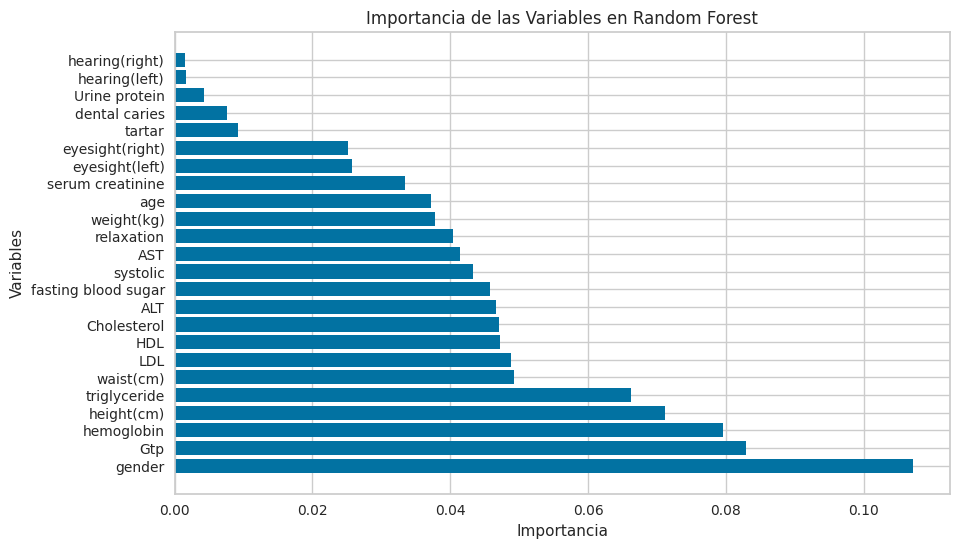

In [ ]:
importances = model.feature_importances_

# Crear un DataFrame para visualizar la importancia de las variables
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

# Visualizar la importancia de las variables en un gráfico de barras verticales
plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), feature_importance_df['Importance'], align="center")
plt.yticks(range(len(importances)), feature_importance_df['Feature'])
plt.xlabel("Importancia")
plt.ylabel("Variables")
plt.title("Importancia de las Variables en Random Forest")
plt.show()

##### **Variables that Contribute the Most to the Model**:
From this analysis, it is possible to conclude that there are some variables that contribute most to the model. Gender is the highest, indicating that women and men face different risks related to smoking. GTP, Hemoglobin, height, and triglycerides are the next variables with significant contributions, suggesting that these markers (or biological signals of health) could be indicative of health problems produced by smoking.

On the other hand, four variables contribute less to the model: tartar, dental caries, urine protein, and hearing (left and right)

### Confusion Matrix Random Forest

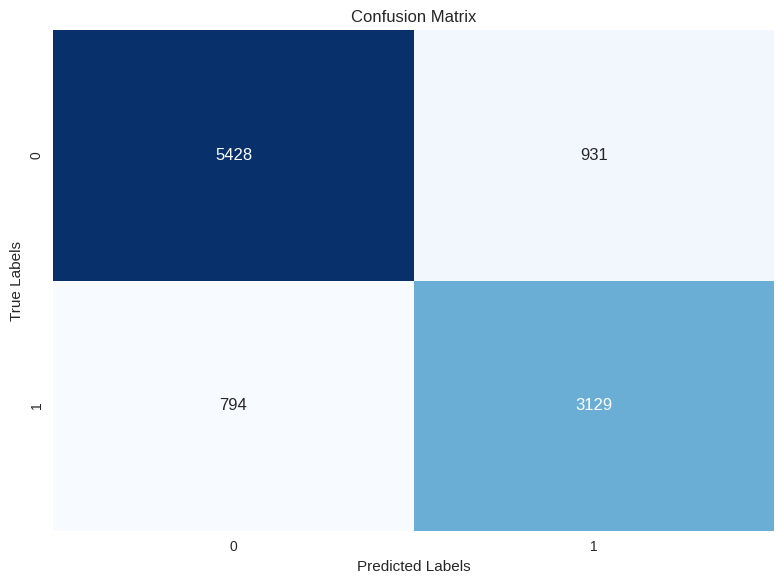

True Negatives (TN): 5428
False Positives (FP): 931
False Negatives (FN): 794
True Positives (TP): 3129
Accuracy: 0.8322310834468002
Sensitivity: 0.7976038745857762
Specificity: 0.8535933322849505


In [ ]:
# Calcular la matriz de confusión
smoking_cm = confusion_matrix(y_test, y_pred_random)

# Crear DataFrame con la matriz de confusión
cm_df = pd.DataFrame(smoking_cm)

# Configurar el tamaño de la figura y el heatmap
plt.figure(figsize=(8, 6))

# Crear un heatmap para visualizar la matriz de confusión
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", cbar=False)

# Añadir etiquetas y título al heatmap
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Mostrar el heatmap
plt.tight_layout()
plt.show()

# Calcular los valores TP, TN, FP y FN
TN, FP, FN, TP = smoking_cm.ravel()

# Calcular la precisión, sensibilidad y especificidad
accuracy = (TP + TN) / (TP + TN + FP + FN)
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

# Imprimir las métricas
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"True Positives (TP): {TP}")
print(f"Accuracy: {accuracy}")
print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")


##### **Conclusions Research Optimal Model and Confusion Matrix**:

The confusion matrix shows that the RF model predicts with good accuracy (83.22%), indicating the proportion of correctly classified instances out of the total instances. Additionally, Sensitivity and Specificity show the proportion of actual positives (79.76%) and negatives (85.36%), respectively, that are correctly identified by the model.